### Problem statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.


The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:


• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


### Importing all the required libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore') # To supress the warnings

pd.set_option('display.max_columns',None)


### Loading the Dataset

In [81]:
#Loading the training dataset
df_train=pd.read_csv("train.csv")
df_train.head() # Print the first 5 rows of the dataset 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [82]:
#Printing the last five records
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1163        31.0        TA        Gd     CBlock       TA       TA   
1164         0.0        TA        TA     CBlock      NaN      NaN   
1165         0.0        TA        TA     CBlock       Gd       TA   
1166         0.0        TA        Fa     BrkTil       TA       TA   
1167         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1163           No          BLQ         450          Unf           0   
1164          NaN          NaN           0          NaN           0   
1165           No          ALQ         566          Unf           0   
1166           No          Unf           0          Unf           0   
1167           No          GLQ         457          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1163        432          882    GasA        TA          Y      SBrkr   
1164          0            0    GasA        Ex          Y      SBrkr   
1165        289          855    GasA        TA          Y      SBrkr   
1166        649          649    GasA        TA          N      SBrkr   
1167        326          783    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1163         1         0             3             1          TA   
1164         2         0             2             1          Gd   
1165         2         1             3             1          TA   
1166         1         0             3             1          TA   
1167         2         1             3             1          Gd   

      To

In [83]:
df_train.shape

(1168, 81)

Here we can see that dataset contains 1168 rows and 81 columns.

In [84]:
df_train.size

94608

Dataset has 94608 number of elements.

In [85]:
# Shows the datatypes of all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      954 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            77 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

Here dataset contain both numerical as well as categorical datatypes such as integer, object and float. 

In [86]:
# Shows all categorical variables
categorical=df_train.select_dtypes(['object'])
categorical

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
8          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
10         RM   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl   
11         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
12         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
13         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
15         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
16         RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
17         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
19         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
21         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
22         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
23         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
24         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
25         RL   Pave   NaN      Reg         Bnk    AllPub    Corner       Gtl   
26         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
27         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
28         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
29         RL   Pave   NaN      IR1         HLS    AllPub    Inside       Mod   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1138       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1139       RL   Grvl   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1140       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1141       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1142       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
1143       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
1144       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1145       RL   Pave   NaN      Reg         Low    AllPub    Corner       Gtl   
1146       RM   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1147       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1148       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1149       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1150       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1151       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1152       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1153       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1154       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1155       RL   Pave   NaN      Reg 

In [87]:
# Shows all numerical variables
numerical=df_train.select_dtypes(['int','float'])
numerical

LotFrontage  MasVnrArea  GarageYrBlt
0             NaN         0.0       1977.0
1            95.0         0.0       1970.0
2            92.0         0.0       1997.0
3           105.0       480.0       1977.0
4             NaN       126.0       1977.0
5            58.0         0.0       2006.0
6             NaN       180.0       1957.0
7            88.0        67.0       1957.0
8            70.0         0.0       1965.0
9            80.0         0.0       1947.0
10           50.0         0.0       1937.0
11           44.0       223.0       2003.0
12          129.0         0.0       2003.0
13           80.0        66.0       1974.0
14           59.0         0.0       1955.0
15           55.0         0.0       1923.0
16            NaN         0.0       2002.0
17           64.0        82.0       2007.0
18            NaN       174.0       1987.0
19           24.0       304.0       1970.0
20           80.0       172.0       2001.0
21           70.0         0.0       1988.0
22           68.0         0.0       1950.0
23            NaN         0.0       1961.0
24           71.0       166.0       1977.0
25            NaN       184.0       1953.0
26            NaN         0.0       2007.0
27           88.0       350.0       2010.0
28           58.0         0.0       1922.0
29           74.0         0.0       1939.0
...           ...         ...          ...
1138         60.0         0.0       1940.0
1139         81.0       104.0          NaN
1140         90.0       365.0       1968.0
1141         50.0         0.0       1993.0
1142          NaN         0.0       1976.0
1143         91.0       554.0       1994.0
1144         66.0         0.0       1941.0
1145         94.0         0.0          NaN
1146         60.0         0.0       1916.0
1147         21.0       285.0       1973.0
1148         75.0         0.0       1977.0
1149         60.0         0.0          NaN
1150         80.0       464.0       2008.0
1151          NaN         0.0       2000.0
1152         37.0       170.0       2003.0
1153          NaN         0.0       2002.0
1154         86.0       300.0       2007.0
1155         60.0         0.0       1965.0
1156         51.0         0.0       1935.0
1157         80.0         0.0       2003.0
1158          NaN         0.0       1977.0
1159         42.0         0.0          NaN
1160         53.0         0.0       1977.0
1161          NaN       344.0       1999.0
1162         45.0         0.0       1938.0
1163          NaN        31.0       1970.0
1164         67.0         0.0       2002.0
1165         24.0         0.0       1976.0
1166         50.0         0.0       1920.0
1167          NaN         0.0       2002.0

[1168 rows x 3 columns]

### Checking the value counts of categorical variables

In [88]:
for col in df_train.columns:
    if df_train[col].dtypes == 'object':
        print(str(col) + ' : ' + str(df_train[col].unique()))
        print(df_train[col].value_counts())
        print("\n")
        

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

There is only one unique value present in utilities column,so that we will be dropping it.

### Data Preprocessing: 

### Checking for missing values in the dataset

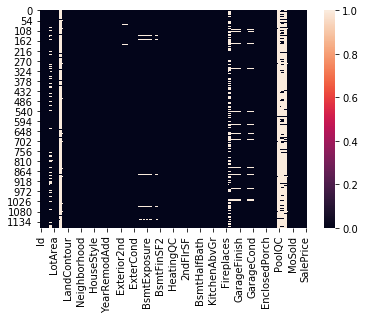

In [89]:
sn.heatmap(df_train.isnull())

In the above heatmap we can clearly see that there are white lines present which shows that there are missing values in the dataset. In order to get more clearity we will take out the sum of the total Null Values.

In [90]:
df_train.isnull().sum().sort_values(ascending=False)

PoolQC           1161
MiscFeature      1124
Alley            1091
Fence             931
FireplaceQu       551
LotFrontage       214
GarageType         64
GarageCond         64
GarageYrBlt        64
GarageFinish       64
GarageQual         64
BsmtExposure       31
BsmtFinType2       31
BsmtFinType1       30
BsmtCond           30
BsmtQual           30
MasVnrArea          7
MasVnrType          7
Exterior2nd         0
Exterior1st         0
OverallCond         0
ExterQual           0
ExterCond           0
Foundation          0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
YearBuilt           0
SalePrice           0
OverallQual         0
                 ... 
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
TotRmsAbvGrd        0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
KitchenQual         0
BsmtUnfSF           0
2ndFlrSF  

In [91]:
df_train.isnull().sum().sum()

5558

- There are missing values in many of the columns and total of 5558 missing values, we need to handle these dataset. 
- In categorical columns there are missing values present in columns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

### Visualizing the percentage of missing values

In [92]:
# MAKING A SERIES CONTAINING PERCENTAGE OF MISSING VALUES FOR EACH COLUMN
missing_value_counts = df_train.isnull().sum()
all_data_na = missing_value_counts / len(df_train)

#DROPPING FEATURES WITH NO MISSING-VALUES
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index)
all_data_na = all_data_na.sort_values(ascending=False)

# MAKING A DATAFRAME WITH THAT SERIES
missing_data = pd.DataFrame({'Missing Data Ratio' :all_data_na})

# CHECKING THE SIZE OF THE DATAFRAME
print('Total number of Features with missing data = '+str(len(missing_data))+'\n')

Total number of Features with missing data = 18



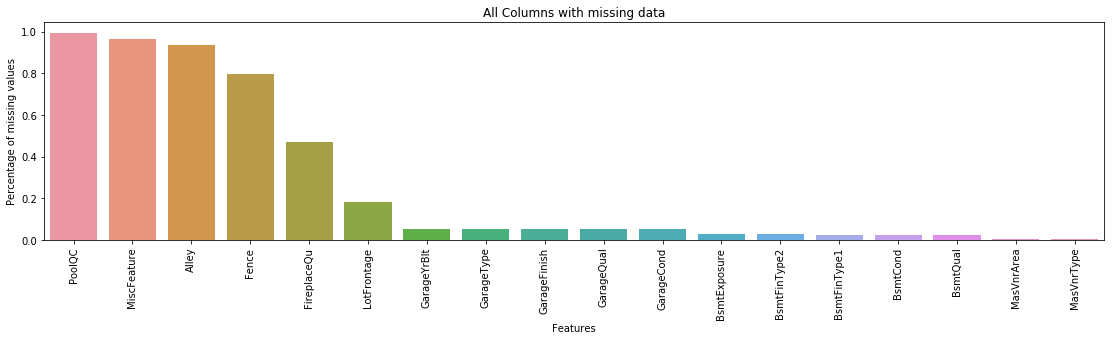

In [93]:
#PLOTTING RATIO OF MISSING VALUES FOR EACH COLUMN
plt.subplots(figsize=(19, 4))
plt.xticks(rotation=90)
sn.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('All Columns with missing data')
plt.show()

### Treating the missing data

In [94]:
## Let's replace NAs with 'None'
df_train['PoolQC'].fillna('None',inplace=True)
print(df_train['PoolQC'].value_counts())

None    1161
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64


In [95]:
basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
#Replacing the missing values in with highest frequency count of categories in each class using mode method.
for col in basement:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

In [96]:
# Let's replace NAs with 'None'
df_train['MiscFeature'].fillna('None',inplace=True)
print(df_train['MiscFeature'].value_counts())

None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64


In [97]:
# Let's replace missing data with 'No_alley_access'
df_train['Alley'].fillna('No_alley_access',inplace=True)
print(df_train['Alley'].value_counts())

No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64


In [98]:
#As per data description NA means No_Fence. Let's replace missing data with 'No_Fence'
df_train['Fence'].fillna('No_Fence',inplace=True)
print(df_train['Fence'].value_counts())

No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name: Fence, dtype: int64


In [99]:
#Let's replace missing data with 'No_Fireplace'
df_train['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df_train['FireplaceQu'].value_counts())

No_Fireplace    551
Gd              301
TA              252
Fa               25
Ex               21
Po               18
Name: FireplaceQu, dtype: int64


In [100]:
# Replacing the missing values with the median
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(),inplace=True)

In [101]:
# Replacing the missing values with the most frequent count
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for col in garage:
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)
    print(df_train[col].value_counts())

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64
Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64
TA    1114
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64
TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


In [102]:
#As per data description we can say that most of the rows of GarageYrBlt has same value as YearBuilt so we replace with that
df_train["GarageYrBlt"]=df_train["GarageYrBlt"].fillna(df_train["YearBuilt"])
print(df_train['GarageYrBlt'].value_counts())

2006.0    53
2005.0    51
2007.0    41
2004.0    37
2003.0    37
1977.0    25
1998.0    25
1999.0    23
2002.0    23
2008.0    21
1976.0    20
1993.0    20
1968.0    19
1950.0    18
1957.0    18
2001.0    18
1962.0    18
1958.0    18
1965.0    18
1966.0    18
2009.0    18
2000.0    18
1997.0    17
1995.0    17
1974.0    17
1971.0    16
1960.0    16
1940.0    16
1959.0    16
1970.0    16
          ..
1951.0     5
1926.0     5
1916.0     5
1923.0     4
1924.0     4
1945.0     4
1931.0     4
1984.0     4
1900.0     3
1947.0     3
1921.0     3
1982.0     3
1952.0     3
1915.0     3
1932.0     3
1929.0     2
1918.0     2
1937.0     2
1912.0     2
1938.0     2
1942.0     2
1934.0     2
2010.0     2
1928.0     2
1908.0     1
1911.0     1
1933.0     1
1906.0     1
1927.0     1
1875.0     1
Name: GarageYrBlt, Length: 100, dtype: int64


In [103]:
#As per given values of MasVnrArea, Let's replace missing data with 0's
df_train['MasVnrArea'].fillna(0,inplace=True)

In [104]:
#Let's fill the missing values in MasVnrType using mode function
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0],inplace=True)

In [105]:
df_train.isnull().sum().sum()

0

We can see that the missing data has been handled in the dataset and when we checked the dataset again, there is no missing data present

### Exploratory Data Analysis

In [106]:
categorical=list(categorical)

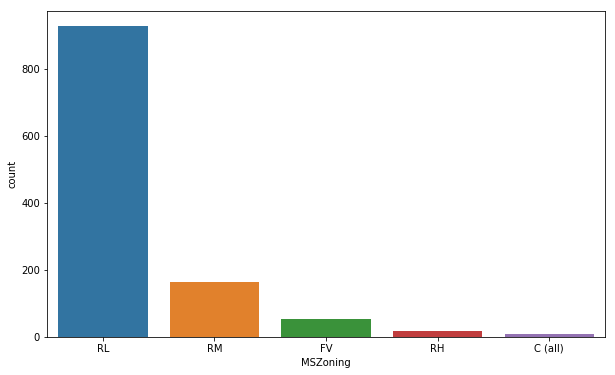



Percentage of data: 

RL         79.0
RM         14.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64


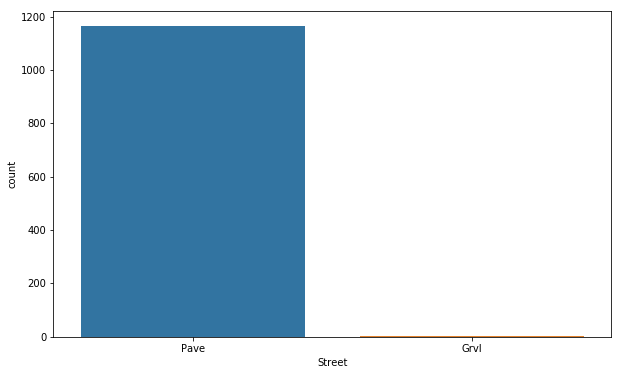



Percentage of data: 

Pave    100.0
Grvl      0.0
Name: Street, dtype: float64


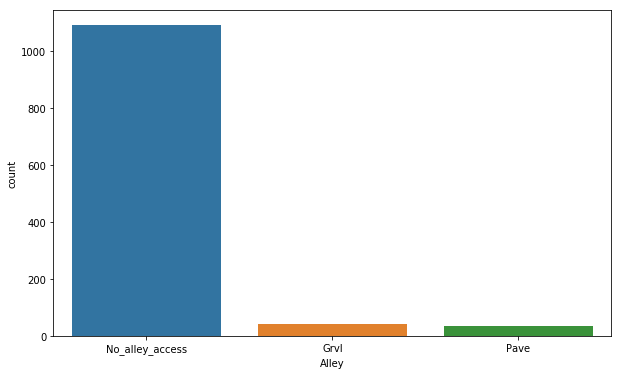



Percentage of data: 

No_alley_access    93.0
Grvl                4.0
Pave                3.0
Name: Alley, dtype: float64


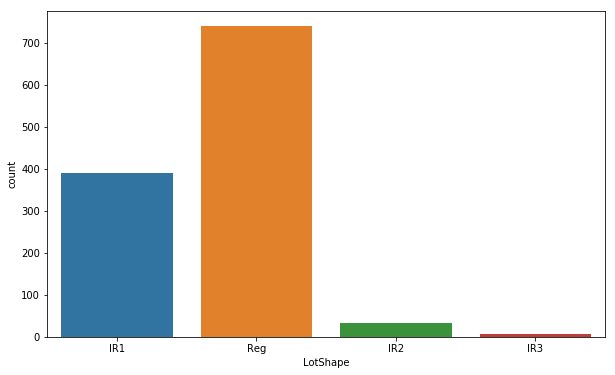



Percentage of data: 

Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64


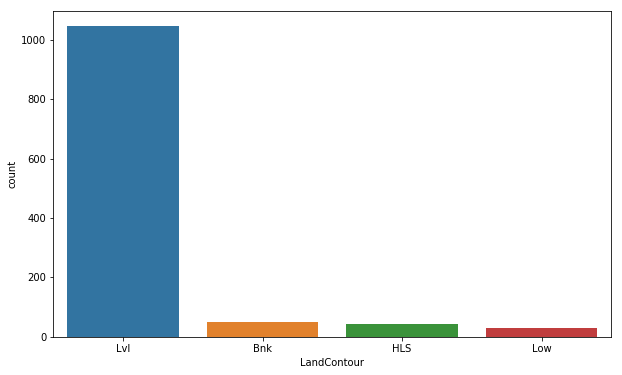



Percentage of data: 

Lvl    90.0
Bnk     4.0
HLS     4.0
Low     3.0
Name: LandContour, dtype: float64


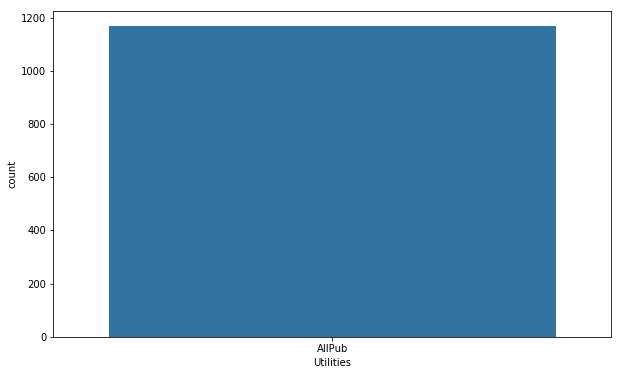



Percentage of data: 

AllPub    100.0
Name: Utilities, dtype: float64


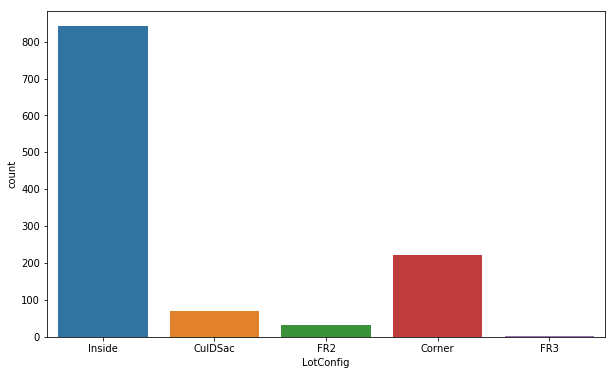



Percentage of data: 

Inside     72.0
Corner     19.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64


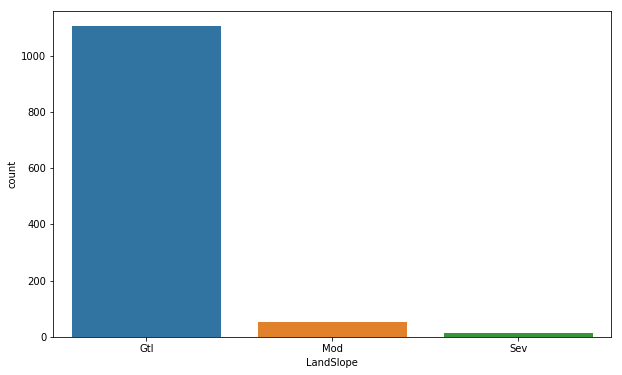



Percentage of data: 

Gtl    95.0
Mod     4.0
Sev     1.0
Name: LandSlope, dtype: float64


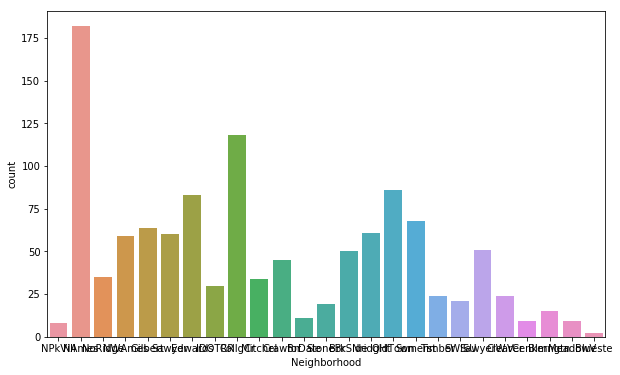



Percentage of data: 

NAmes      16.0
CollgCr    10.0
OldTown     7.0
Edwards     7.0
Somerst     6.0
Gilbert     5.0
NridgHt     5.0
Sawyer      5.0
NWAmes      5.0
SawyerW     4.0
BrkSide     4.0
Crawfor     4.0
NoRidge     3.0
Mitchel     3.0
IDOTRR      3.0
Timber      2.0
ClearCr     2.0
SWISU       2.0
StoneBr     2.0
Blmngtn     1.0
BrDale      1.0
Veenker     1.0
MeadowV     1.0
NPkVill     1.0
Blueste     0.0
Name: Neighborhood, dtype: float64


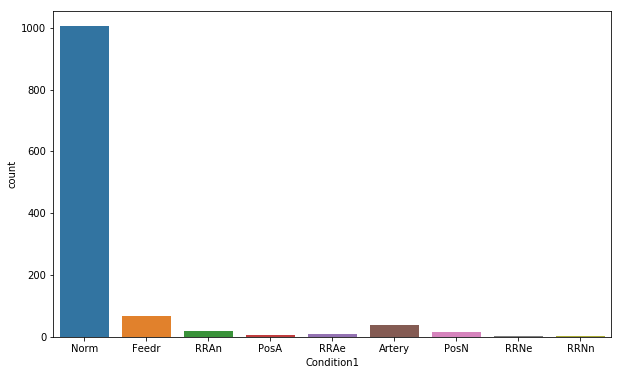



Percentage of data: 

Norm      86.0
Feedr      6.0
Artery     3.0
RRAn       2.0
PosN       1.0
RRAe       1.0
PosA       1.0
RRNn       0.0
RRNe       0.0
Name: Condition1, dtype: float64


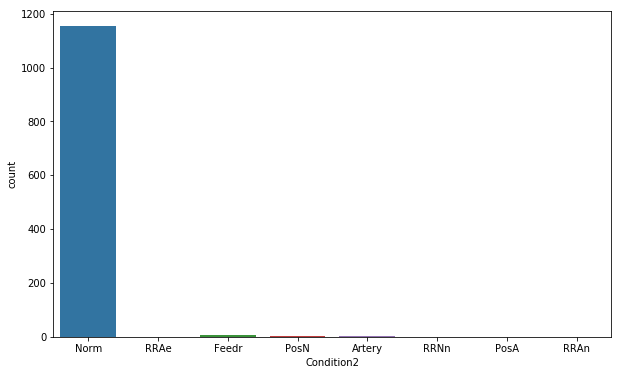



Percentage of data: 

Norm      99.0
Feedr      1.0
Artery     0.0
PosN       0.0
RRAn       0.0
RRAe       0.0
PosA       0.0
RRNn       0.0
Name: Condition2, dtype: float64


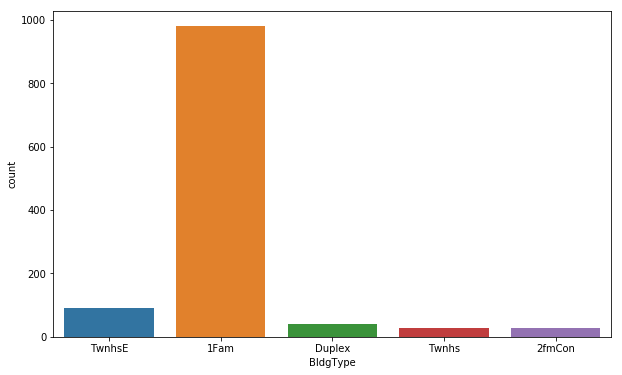



Percentage of data: 

1Fam      84.0
TwnhsE     8.0
Duplex     4.0
Twnhs      2.0
2fmCon     2.0
Name: BldgType, dtype: float64


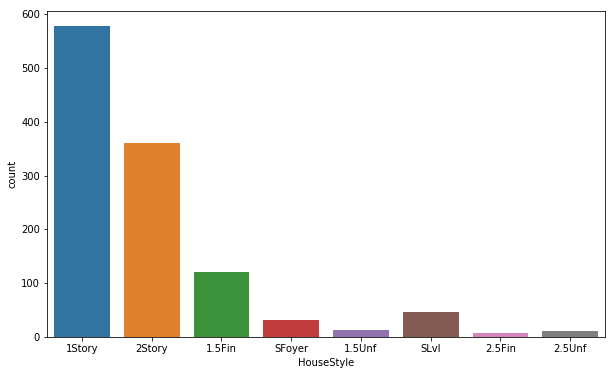



Percentage of data: 

1Story    49.0
2Story    31.0
1.5Fin    10.0
SLvl       4.0
SFoyer     3.0
1.5Unf     1.0
2.5Unf     1.0
2.5Fin     1.0
Name: HouseStyle, dtype: float64


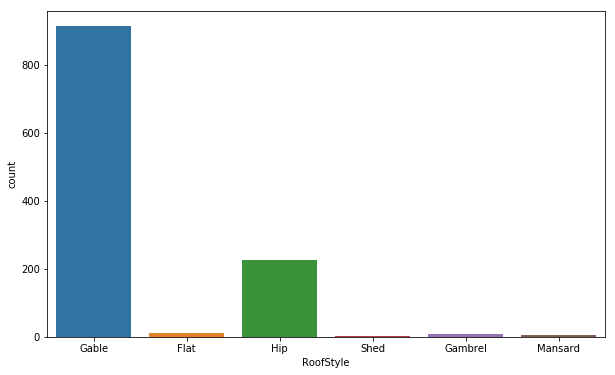



Percentage of data: 

Gable      78.0
Hip        19.0
Flat        1.0
Gambrel     1.0
Mansard     0.0
Shed        0.0
Name: RoofStyle, dtype: float64


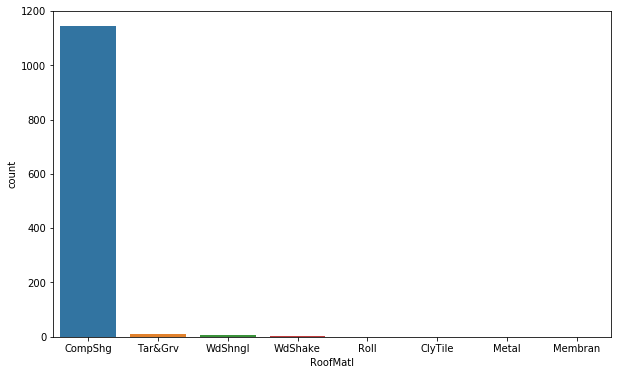



Percentage of data: 

CompShg    98.0
Tar&Grv     1.0
WdShngl     1.0
WdShake     0.0
Membran     0.0
Metal       0.0
Roll        0.0
ClyTile     0.0
Name: RoofMatl, dtype: float64


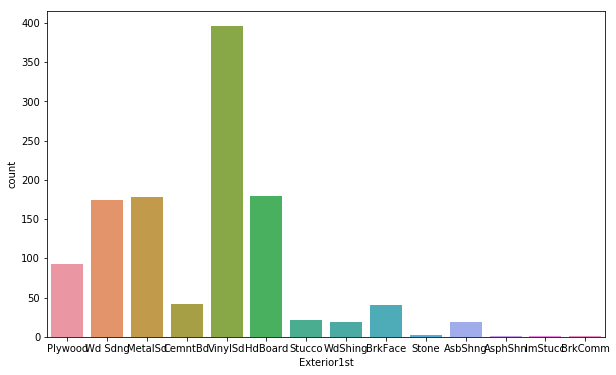



Percentage of data: 

VinylSd    34.0
HdBoard    15.0
MetalSd    15.0
Wd Sdng    15.0
Plywood     8.0
CemntBd     4.0
BrkFace     4.0
Stucco      2.0
AsbShng     2.0
WdShing     2.0
Stone       0.0
BrkComm     0.0
AsphShn     0.0
ImStucc     0.0
Name: Exterior1st, dtype: float64


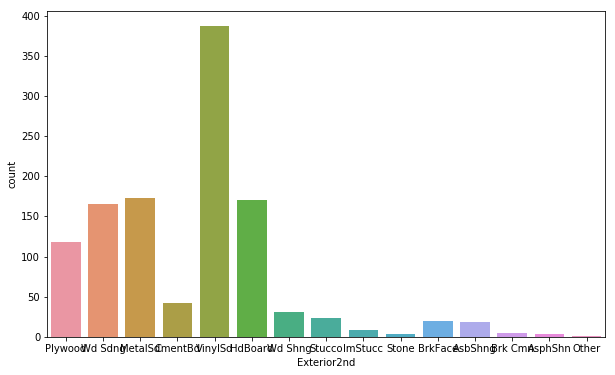



Percentage of data: 

VinylSd    33.0
MetalSd    15.0
HdBoard    15.0
Wd Sdng    14.0
Plywood    10.0
CmentBd     4.0
Wd Shng     3.0
Stucco      2.0
BrkFace     2.0
AsbShng     2.0
ImStucc     1.0
Brk Cmn     0.0
Stone       0.0
AsphShn     0.0
Other       0.0
Name: Exterior2nd, dtype: float64


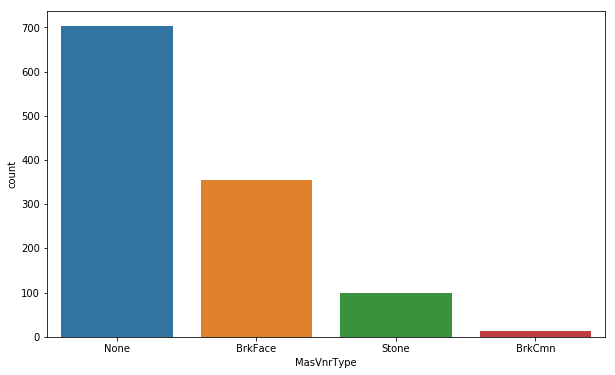



Percentage of data: 

None       60.0
BrkFace    30.0
Stone       8.0
BrkCmn      1.0
Name: MasVnrType, dtype: float64


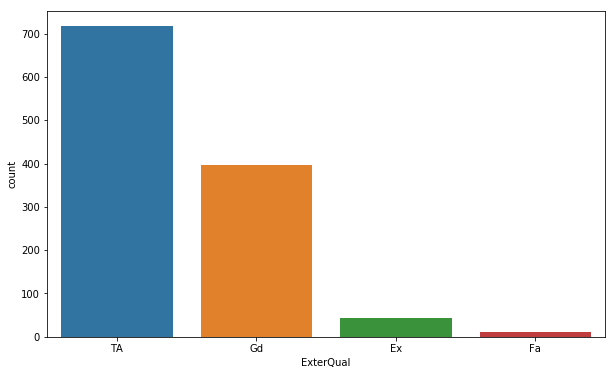



Percentage of data: 

TA    61.0
Gd    34.0
Ex     4.0
Fa     1.0
Name: ExterQual, dtype: float64


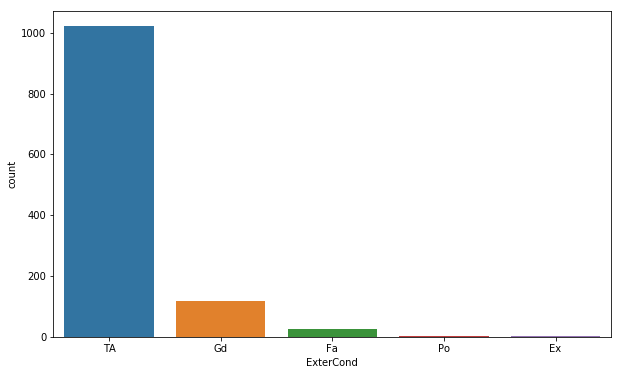



Percentage of data: 

TA    88.0
Gd    10.0
Fa     2.0
Ex     0.0
Po     0.0
Name: ExterCond, dtype: float64


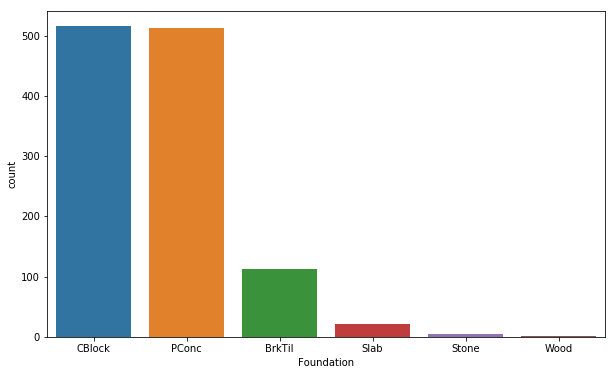



Percentage of data: 

CBlock    44.0
PConc     44.0
BrkTil    10.0
Slab       2.0
Stone      0.0
Wood       0.0
Name: Foundation, dtype: float64


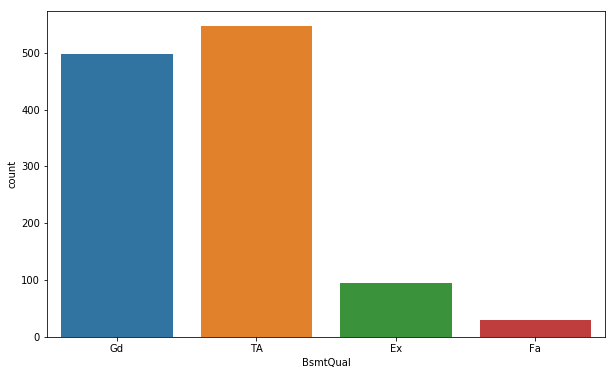



Percentage of data: 

TA    47.0
Gd    43.0
Ex     8.0
Fa     2.0
Name: BsmtQual, dtype: float64


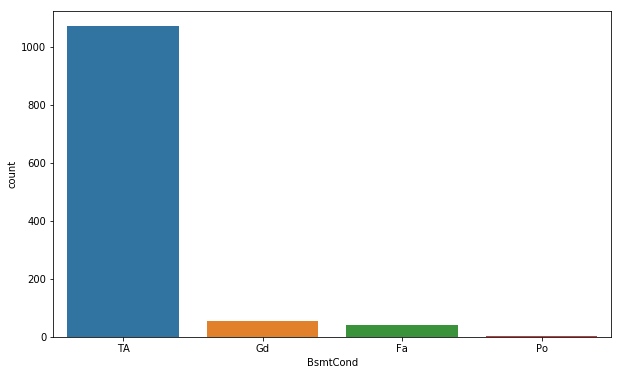



Percentage of data: 

TA    92.0
Gd     5.0
Fa     3.0
Po     0.0
Name: BsmtCond, dtype: float64


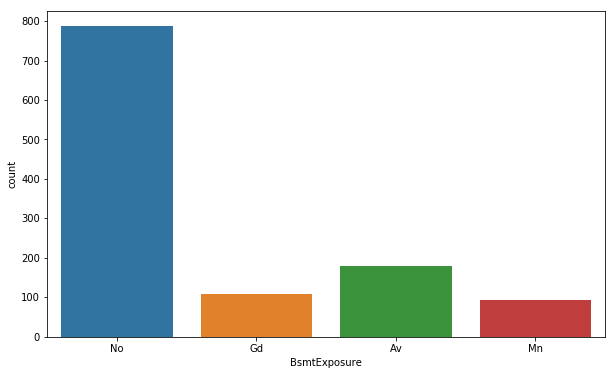



Percentage of data: 

No    67.0
Av    15.0
Gd     9.0
Mn     8.0
Name: BsmtExposure, dtype: float64


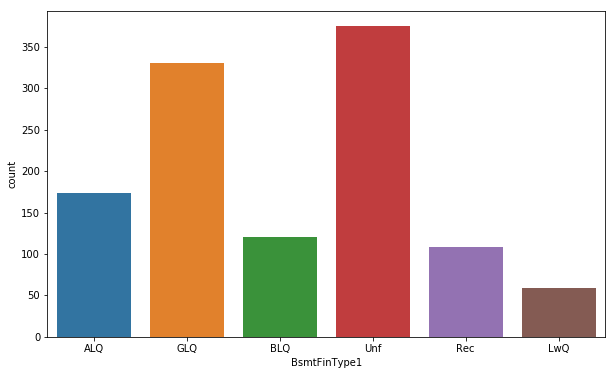



Percentage of data: 

Unf    32.0
GLQ    28.0
ALQ    15.0
BLQ    10.0
Rec     9.0
LwQ     5.0
Name: BsmtFinType1, dtype: float64


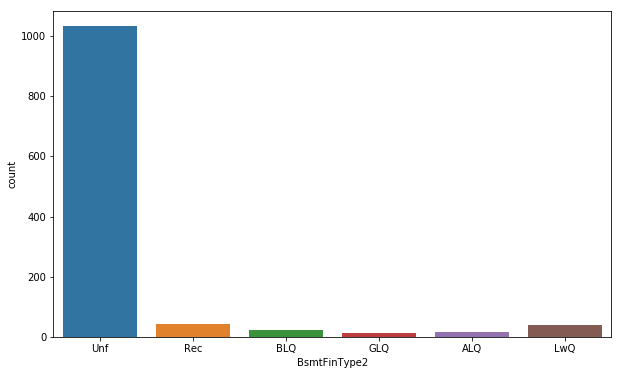



Percentage of data: 

Unf    88.0
Rec     4.0
LwQ     3.0
BLQ     2.0
ALQ     1.0
GLQ     1.0
Name: BsmtFinType2, dtype: float64


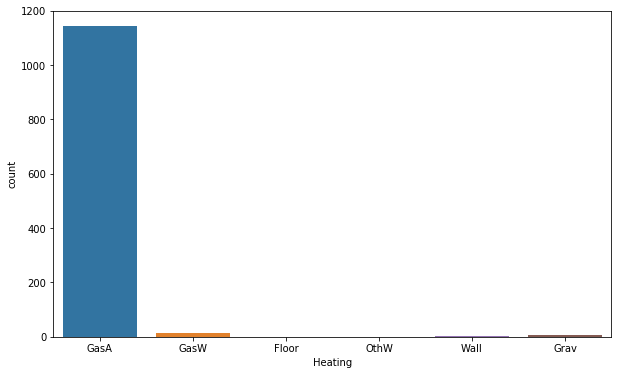



Percentage of data: 

GasA     98.0
GasW      1.0
Grav      0.0
Wall      0.0
Floor     0.0
OthW      0.0
Name: Heating, dtype: float64


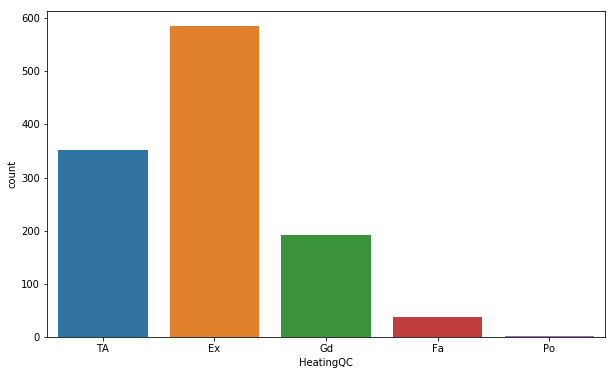



Percentage of data: 

Ex    50.0
TA    30.0
Gd    16.0
Fa     3.0
Po     0.0
Name: HeatingQC, dtype: float64


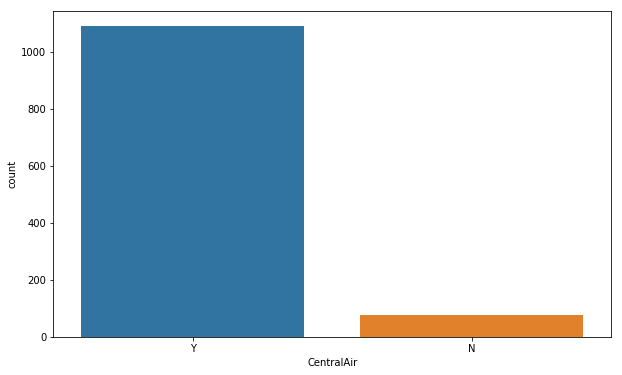



Percentage of data: 

Y    93.0
N     7.0
Name: CentralAir, dtype: float64


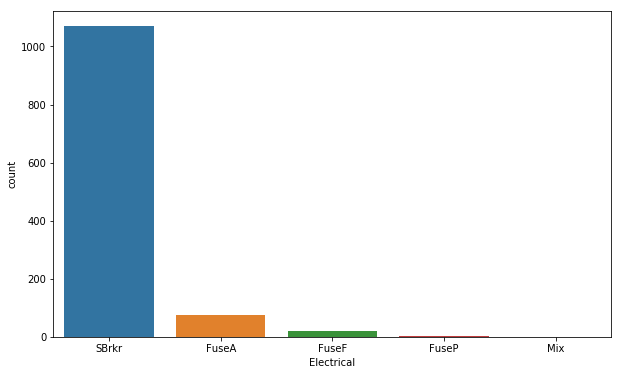



Percentage of data: 

SBrkr    92.0
FuseA     6.0
FuseF     2.0
FuseP     0.0
Mix       0.0
Name: Electrical, dtype: float64


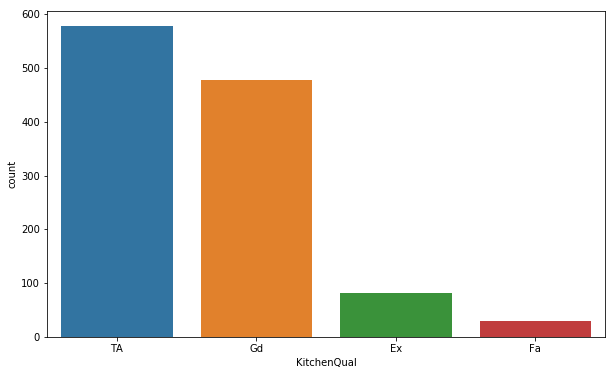



Percentage of data: 

TA    49.0
Gd    41.0
Ex     7.0
Fa     3.0
Name: KitchenQual, dtype: float64


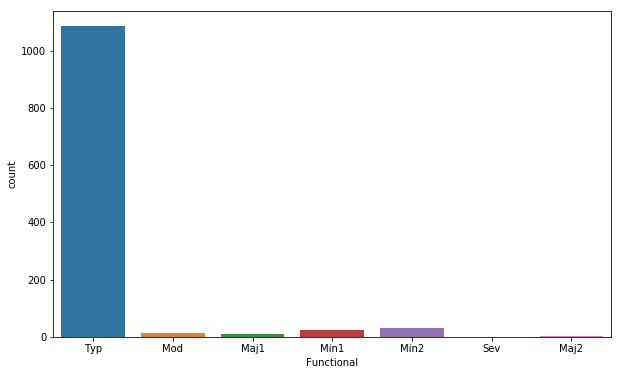



Percentage of data: 

Typ     93.0
Min2     3.0
Min1     2.0
Mod      1.0
Maj1     1.0
Maj2     0.0
Sev      0.0
Name: Functional, dtype: float64


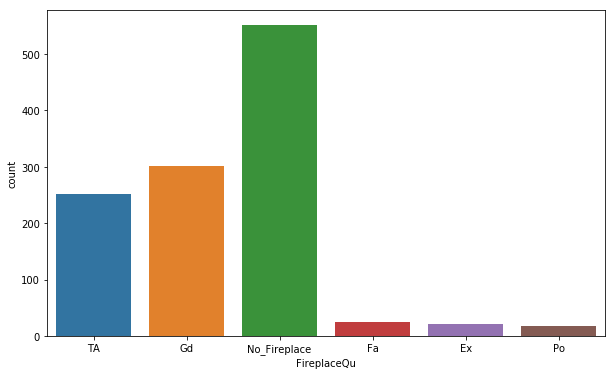



Percentage of data: 

No_Fireplace    47.0
Gd              26.0
TA              22.0
Fa               2.0
Ex               2.0
Po               2.0
Name: FireplaceQu, dtype: float64


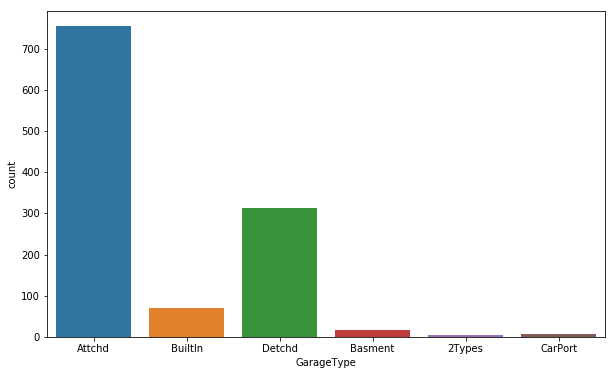



Percentage of data: 

Attchd     65.0
Detchd     27.0
BuiltIn     6.0
Basment     1.0
CarPort     1.0
2Types      0.0
Name: GarageType, dtype: float64


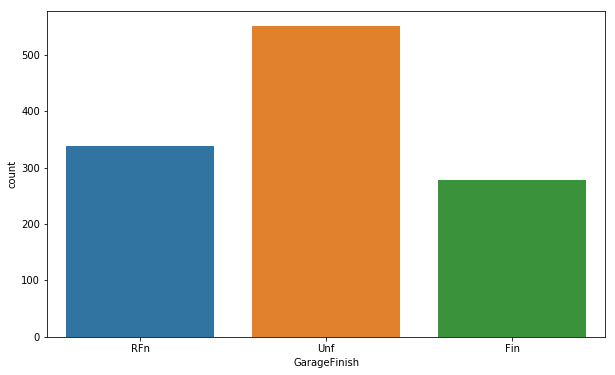



Percentage of data: 

Unf    47.0
RFn    29.0
Fin    24.0
Name: GarageFinish, dtype: float64


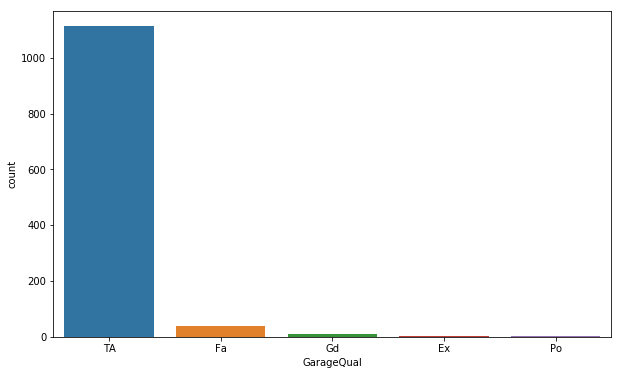



Percentage of data: 

TA    95.0
Fa     3.0
Gd     1.0
Po     0.0
Ex     0.0
Name: GarageQual, dtype: float64


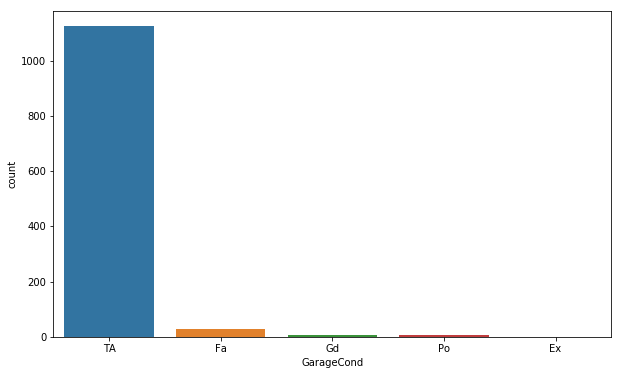



Percentage of data: 

TA    96.0
Fa     2.0
Gd     1.0
Po     1.0
Ex     0.0
Name: GarageCond, dtype: float64


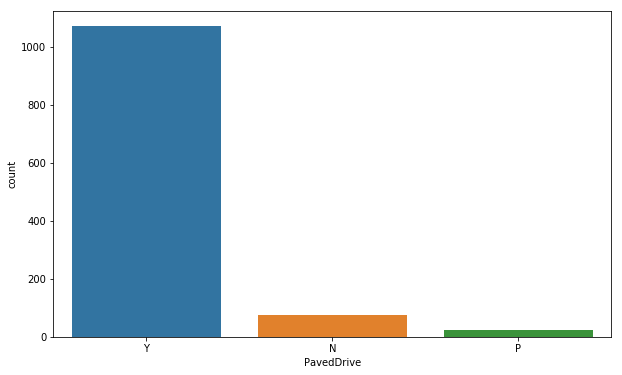



Percentage of data: 

Y    92.0
N     6.0
P     2.0
Name: PavedDrive, dtype: float64


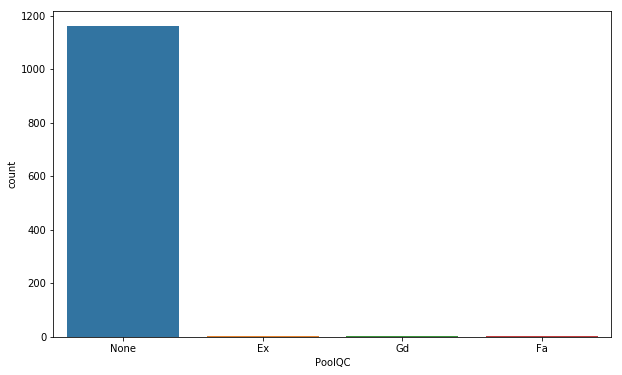



Percentage of data: 

None    99.0
Gd       0.0
Fa       0.0
Ex       0.0
Name: PoolQC, dtype: float64


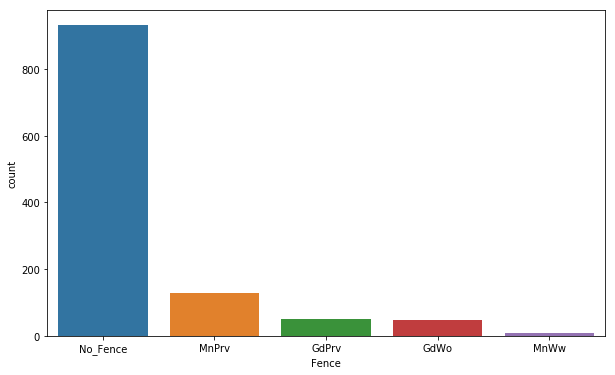



Percentage of data: 

No_Fence    80.0
MnPrv       11.0
GdPrv        4.0
GdWo         4.0
MnWw         1.0
Name: Fence, dtype: float64


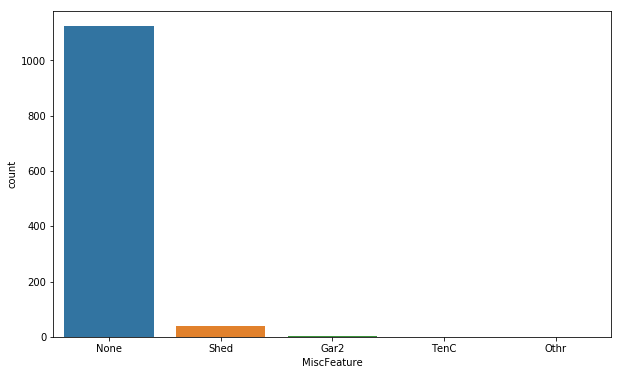



Percentage of data: 

None    96.0
Shed     3.0
Gar2     0.0
TenC     0.0
Othr     0.0
Name: MiscFeature, dtype: float64


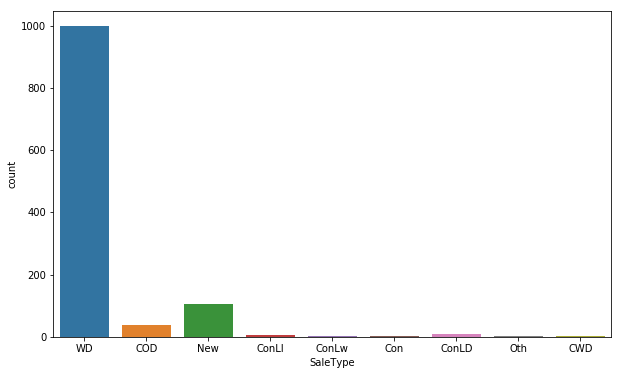



Percentage of data: 

WD       86.0
New       9.0
COD       3.0
ConLD     1.0
ConLI     0.0
ConLw     0.0
Oth       0.0
CWD       0.0
Con       0.0
Name: SaleType, dtype: float64


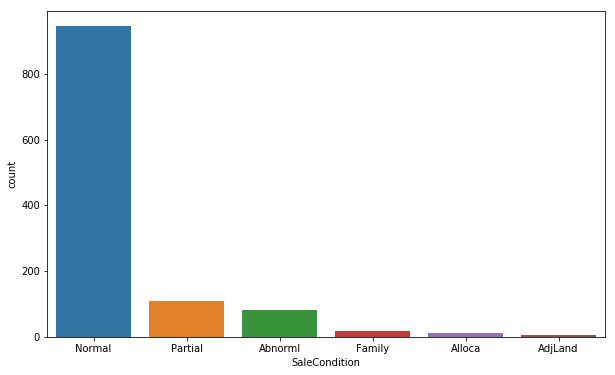



Percentage of data: 

Normal     81.0
Partial     9.0
Abnorml     7.0
Family      2.0
Alloca      1.0
AdjLand     0.0
Name: SaleCondition, dtype: float64


In [107]:
for i in categorical:
    plt.figure(figsize=(10,6))
    sn.countplot(df_train[i])
    plt.show()
    print('\n')
    print("Percentage of data: \n")
    print(round(df_train[i].value_counts(normalize=True)*100))  #1168 is the entire data

### Observations



- By looking at countplot of MSZoning ,which Identifies the general zoning classification of the sale,we find that 79 % of houses were sold in Low density resedential Areas.


- For street ,which states:Type of road access to property,we observe that almost 100% of house which were sold had access to paved roads so we can consider that no houses were purchased which had gravel road access.


- For Alley,93% of the purchased house do not have access to alley.Only 4% have gravel & 3% have paved alley.


- LotShape : 63% of the sold property was of Regular shape followed by slightly irregular type (33%).It means Australian gives priority to regular shaped houses.


- LandContour :90% of sold houses were neary flat level.


- LotConfig : 72% of purchased houses had Inside lot of the property.


- LandSlope :Around 95% of the sold property had gentle slope


- Neighborhood: Physical locations within Ames city limits-:highest 16% of purhcased houses has neighbourhood of NWAmes(Northwest Ames) followed by CollgCr(College Creek) and least houses were purchased in neighbour hood of Bluestem


- Condition1: Proximity to various conditions-:86% of purchased houses had normal proximity to various conditions1 and least 0.00 had RRne,RRNn proximity


- Condition2: Proximity to various conditions (if more than one is present)-:99% of purchased houses had normal proximity to various conditions2


- BldgType: Type of dwelling-:84% purchased houses were single family detached,followed by 8% 2FmCon(Two-family Conversion)


- HouseStyle: Style of dwelling-:49% houses had 1story followed by 2story style (31%)


- RoofStyle: Type of roof-:78% of houses have Gable roof style and 19% have Hip roof style


- RoofMatl: Roof material-:98% houses have CompShg(Standard (Composite) Shingle) roof material


- Exterior1st: Exterior covering on house-:34% houses have Vinylsiding covering on exteriors 15% have hard board and metal siding


- Exterior2nd: Exterior covering on house (if more than one material)-:33% houses have VinylSd(Vinyl Siding) 15% have hard board and metal siding


- MasVnrType: Masonry veneer type-:60% of houses have no masonry veneer type followed by BrkFace(Brick Face) (30%)


- ExterQual: Evaluates the quality of the material on the exterior-:61% of the sold hoUse have TA(Average/Typical) quality material on exterior followed by Gd(Good) 34%


- ExterCond: Evaluates the present condition of the material on the exterior-:88% houses are currently in TA(average) condition of exterior material


- Foundation: Type of foundation-:44% houses have foundation CBlock(Cinder Block) & 44% have PConc(Poured Contrete)


- BsmtQual: Evaluates the height of the basement-:44% of houses have TA(typical) (80-89 inches) basement height followed by Gd(Good) (90-99 inches)


- BsmtCond: Evaluates the general condition of the basement-:89% of houses have TA(Typical - slight dampness allowed) basment


- BsmtExposure: Refers to walkout or garden level walls-:64% of houses have No(No Exposure) followed by Av(Average Exposure ) 15%


- BsmtFinType1: Rating of basement finished area-:(30%) have Unf(Unfinshed) basement area and 28% comes under GLQ(good living quarters)


- Heating: Type of heating-:98% houses have GasA(Gas forced warm air furnace) heating type


- HeatingQC: Heating quality and condition-:30% houses have average quality heating


- CentralAir: Central air conditioning-:93% houses are central air


- Electrical: Electrical system-:92% houses have SbrKr(Standard Circuit Breakers & Romex) type of electrical systems


- KitchenQual: Kitchen quality-:49% houses have average (TA) kitchen quality


- Functional: Home functionality (Assume typical unless deductions are warranted)-:92% houses have typical (TA) home functionality


- FireplaceQu: Fireplace quality-:47% of the houses donot have fireplace,25% houses have Gd(Good - Masonry Fireplace in main level) FireplaceQuality


- GarageType: Garage location-:57% houses have Attached garage type,while 29% have Detchd(Detached from home)


- GarageFinish: Interior finish of the garage:42% of houses have unfinished garage while 29% have RFn(Rough Finished)


- GarageQual: Garage quality-:90% of houses have average garage quality


- GarageCond: Garage condition-:91% of houses have TA( average garage condition)


- PavedDrive: Paved driveway-:92% of houses have Y( paved drive) way


- Fence: Fence quality-:89% houses have NA(no fence).


- MiscFeature: Miscellaneous feature-:96% houses have no miscellaneous features


- SaleType: Type of sale-:85% houses have sale type WD(warranty deed -conventional)


- SaleCondition:81% of houses are in normal sale condition

In [108]:
#Taking all continuous data and analyzing it
cont=[x for x in df_train.columns if x not in categorical]

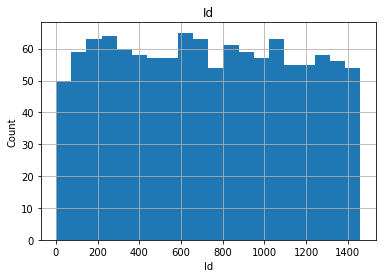

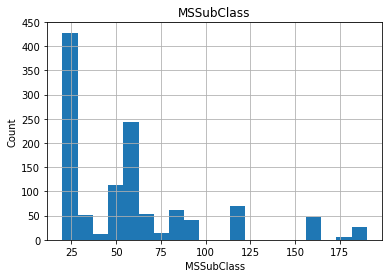

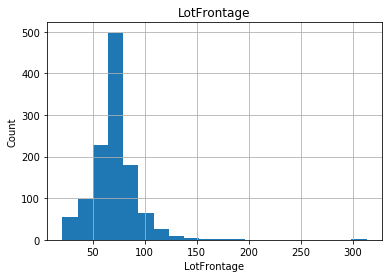

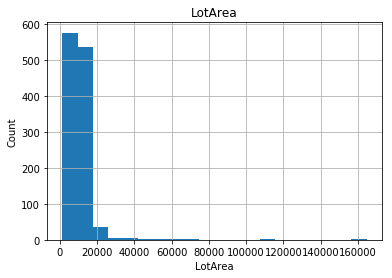

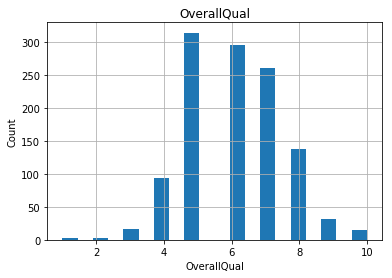

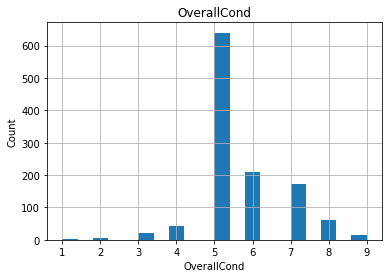

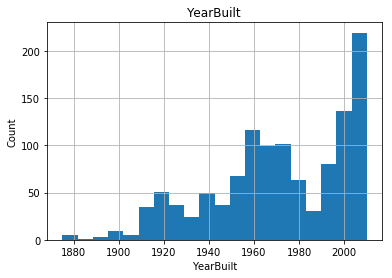

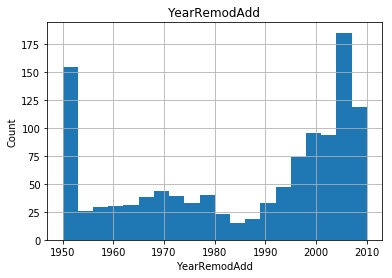

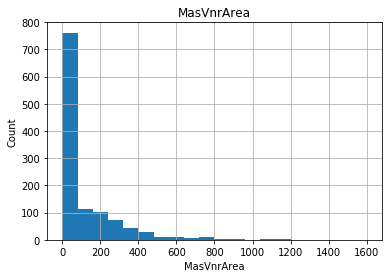

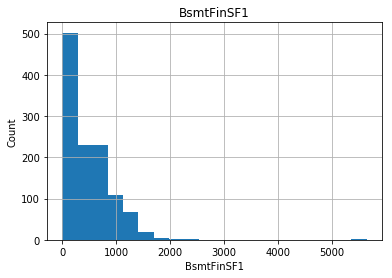

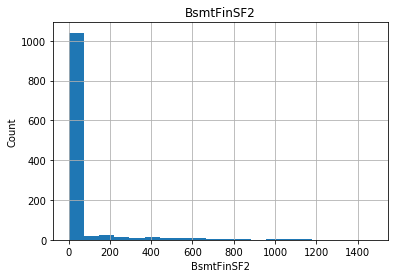

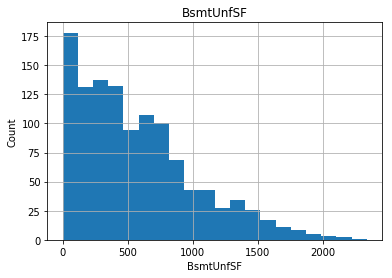

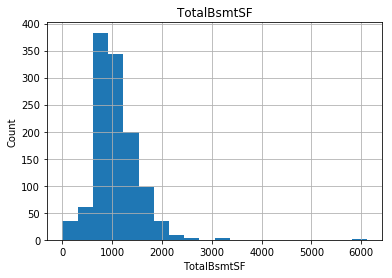

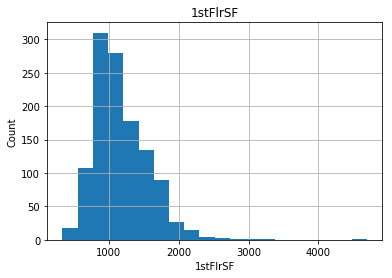

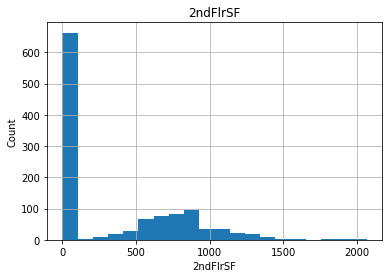

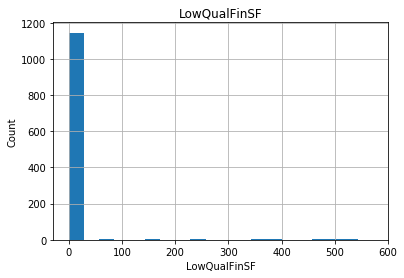

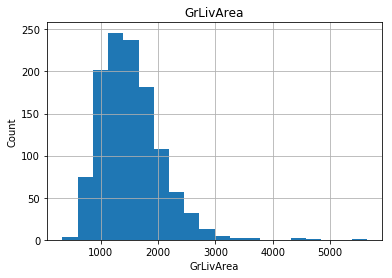

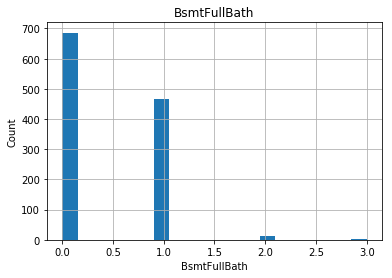

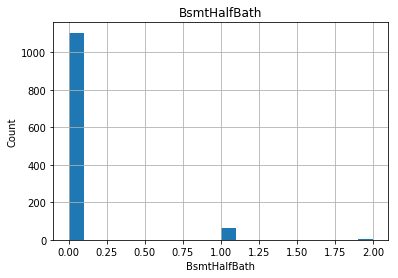

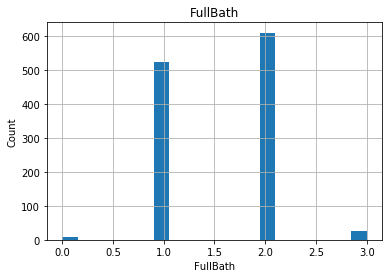

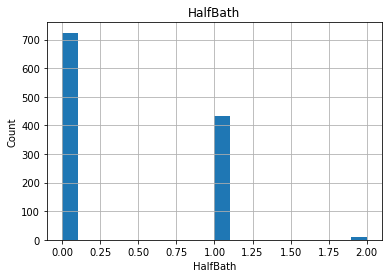

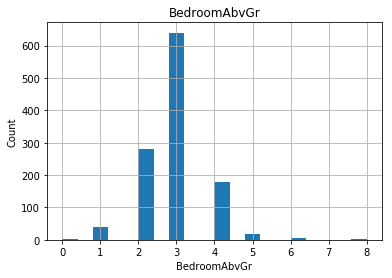

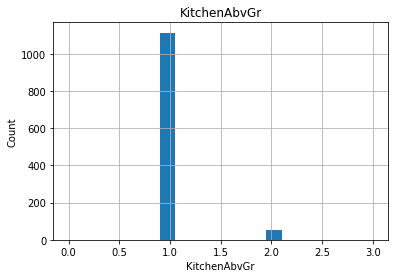

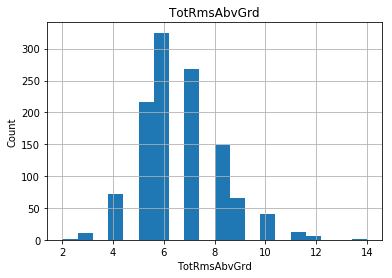

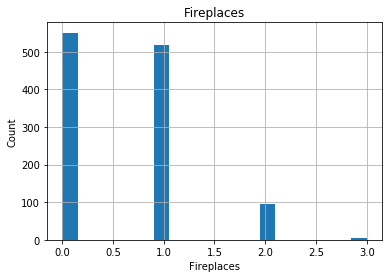

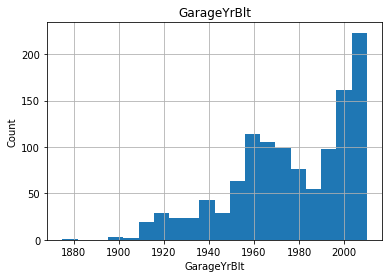

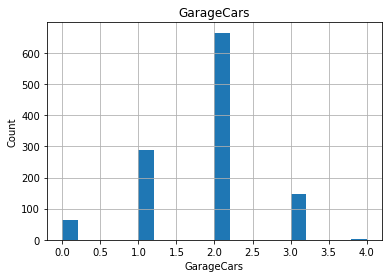

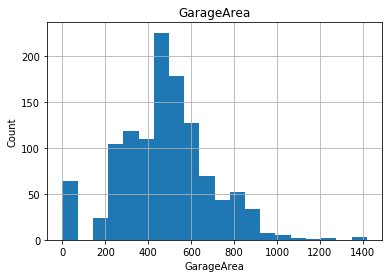

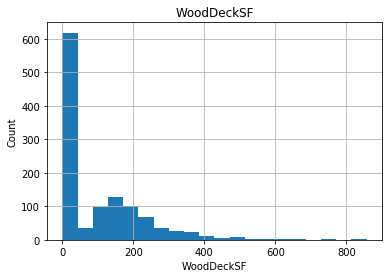

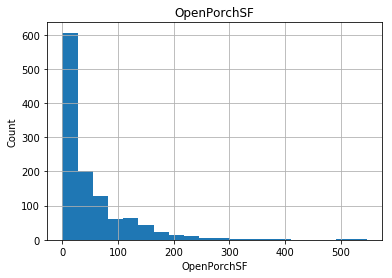

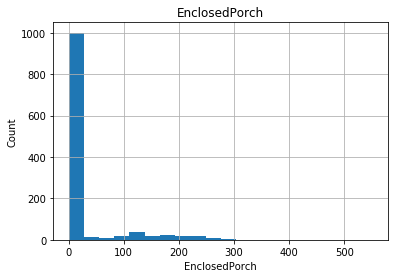

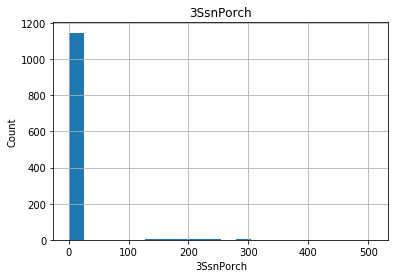

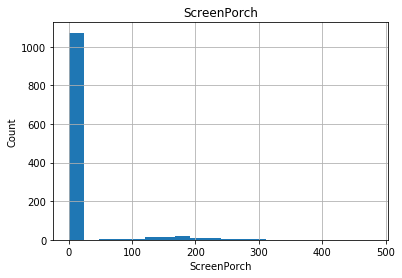

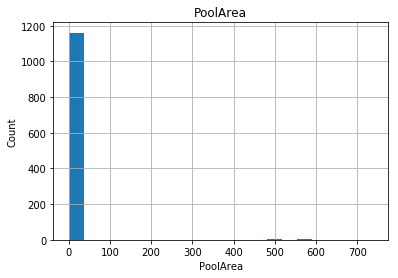

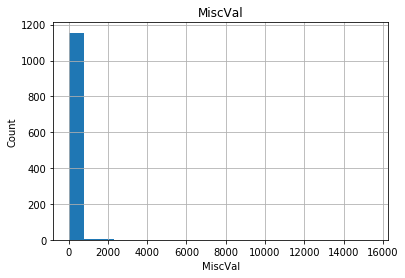

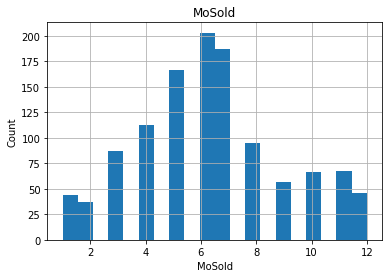

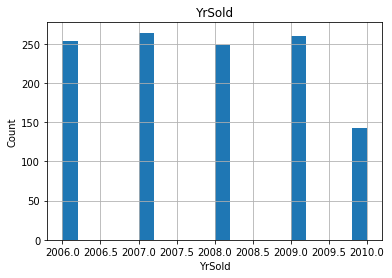

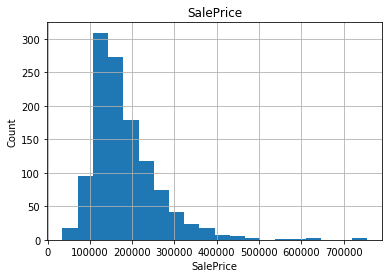

In [109]:
#visualizing each continuous features using histogram
for i in cont:
    data=df_train.copy()
    data[i].hist(bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

### Observations



- lotFrontage:Almost all houses have LotFrontage between 20 to 150

- lotArea:Around 580 house have lot Area between (0-10000)sqft.Very few houses have lot area aound 120000sqft & around 160000sqft

- OverallQual: Rates the overall material and finish of the house-:Around 300 houses sold were in average condition.Only 10-15 houses were in excellent condition.

- YearBuilt: Original construction date-:More number of people have brought the houses build after 1990

- MasVnrArea: Masonry veneer area in square feet-:50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200

- BsmtFinSF1: Type 1 finished square feet-:MOst houses have Type 1 finished square feet area of basement between 0 and 1500

- BsmtFinSF2: Type 2 finished square feet-:Around 1000 houses have Type 2 finished square feet area of 0

- BsmtUnfSF: Unfinished square feet of basement area-:Around 130 houses have unfinished basesent of area around 100-500 sqft

- 1stFlrSF: First Floor square feet-:Around 280 houses have 1st floor square feet area between 800-1200sqft

- GrLivArea: Above grade (ground) living area square feet-:Most houses have above ground living sq ft area in between 800 to 3000

- BsmtFullBath: Basement full bathrooms-:50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathrooms in basement and very few has 2 full bathrooms

- FullBath: Full bathrooms above grade-:25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3

- HalfBath: Half baths above grade-: around 700 houses have no half bathrooms very few has 1 half bathroom

- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)-:Most houses have 3 bedrooms above ground followed by 2 and 4

- Kitchen: Kitchens above grade-:Maximum houses have 1 Kitchen .very few have 2

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)-:Around 300 houses have 6 rooms ,around 200 have 5,&250 have 7. Very few have 12 & 14 rooms

- Fireplaces: Number of fireplaces-:Most houses have 0 fireplaces followed by 1

- GarageCars: Size of garage in car capacity-:Most houses have garage with 2 car capcity

- GarageArea: Size of garage in square feet-:Most houses have Garage area in between 200 to 800

- woodDeckSF: Wood deck area in square feet-:More than 50% of houses have 0 Wood Deck sq ft area and rest have in between 0 to 400

- OpenPorchSF: Open porch area in square feet-:25% of houses have 0 open porch sq ft area and rest have in between 0 to 300

- EnclosedPorch: Enclosed porch area in square feet-:Almost all houses have 0 enclosed porch sq ft area

- ScreenPorch: Screen porch area in square feet-:Almost all houses have 0 screen porch area sq ft

- Sale Price-:Around 500 house have sale price in between 100000 to 200000.Very few houses have sale price of 600000 & 700000

### Bivariate Analysis

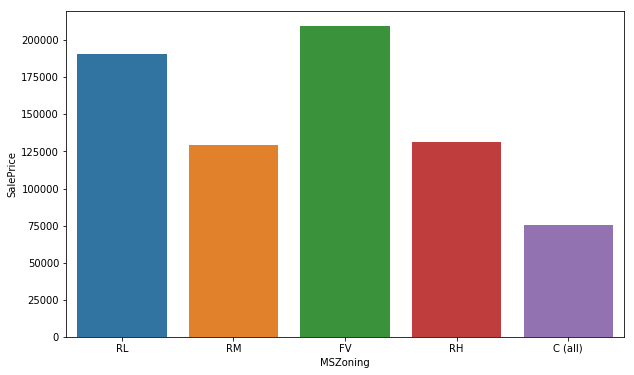

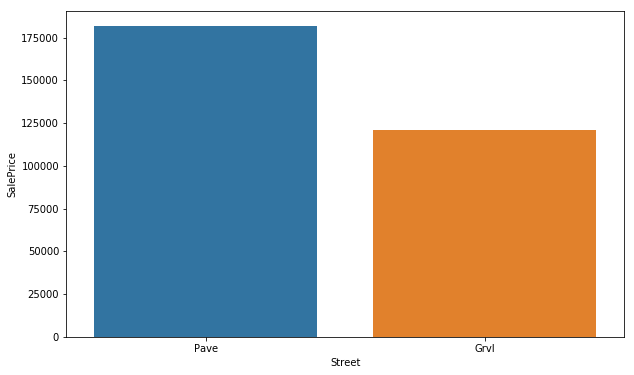

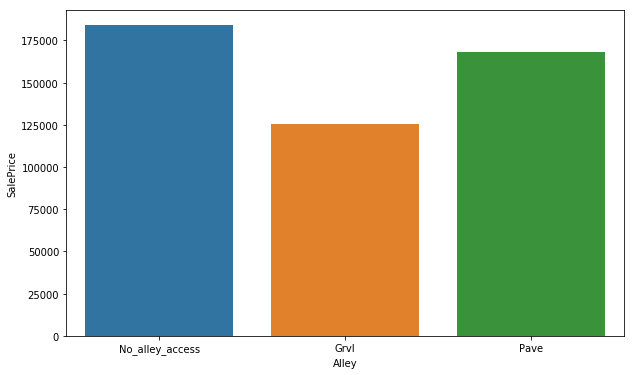

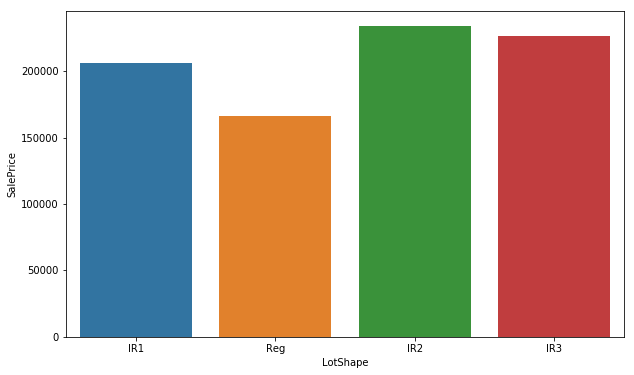

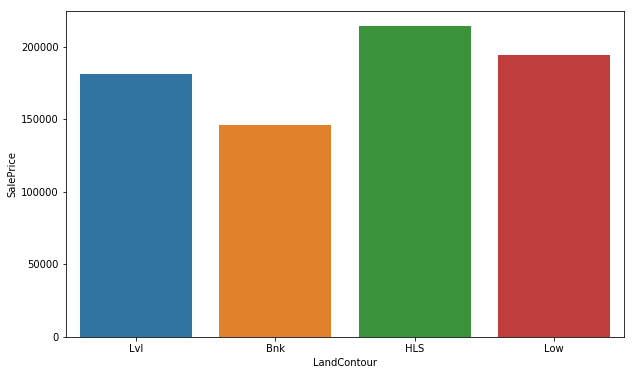

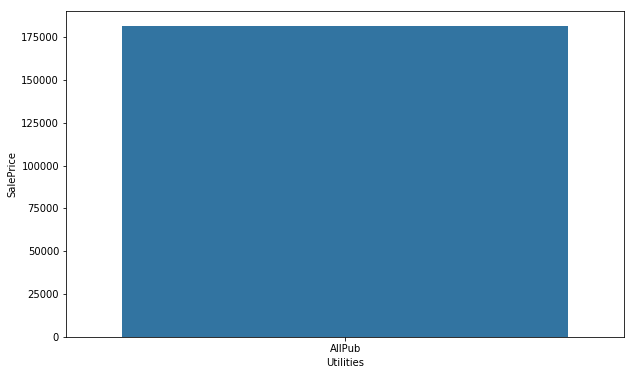

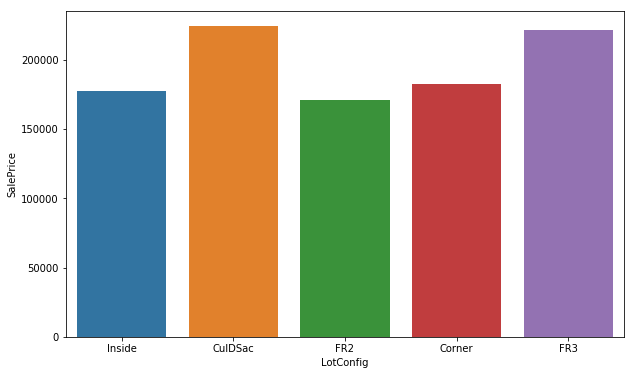

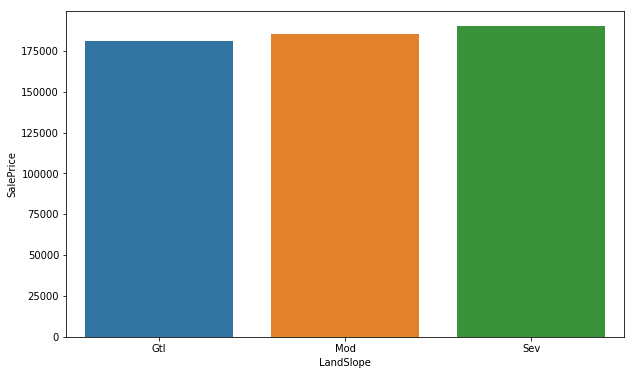

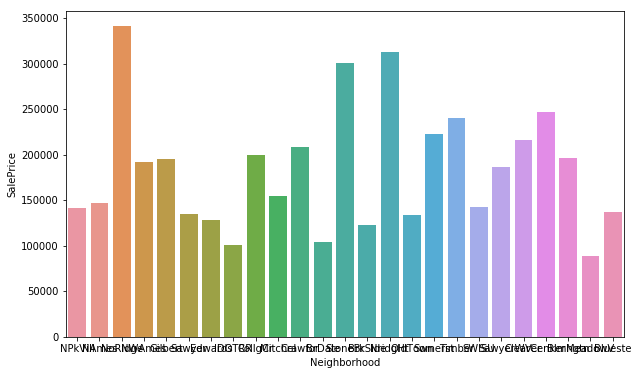

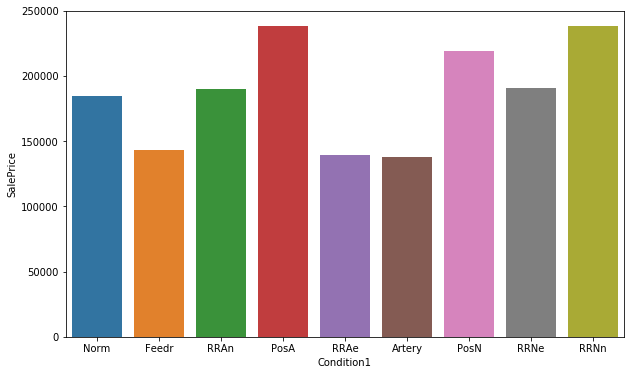

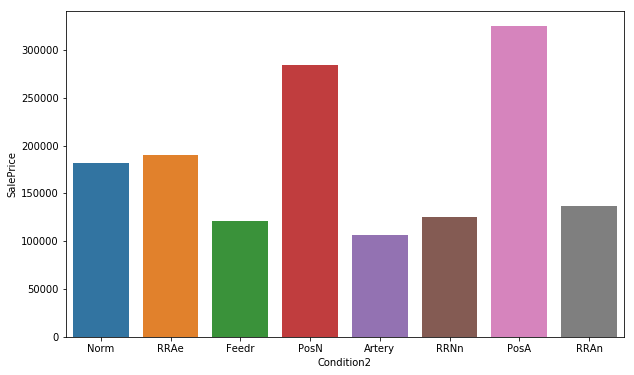

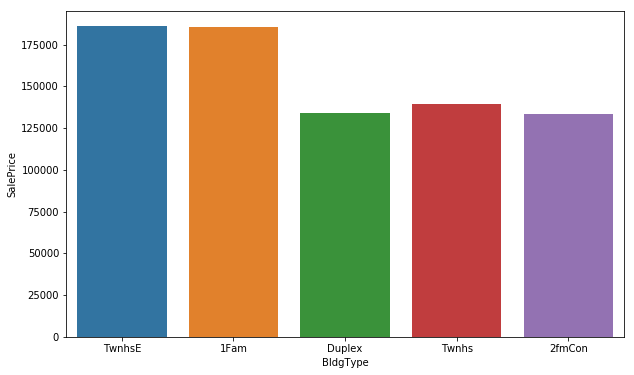

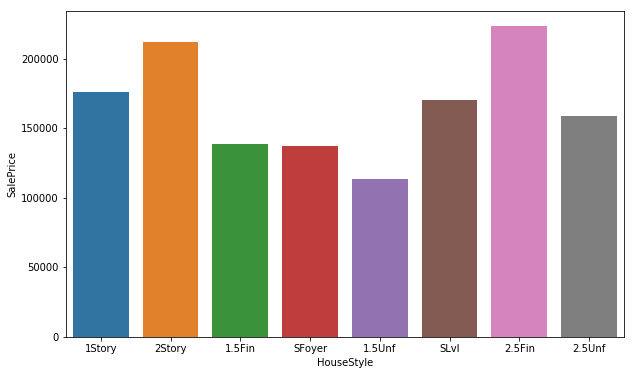

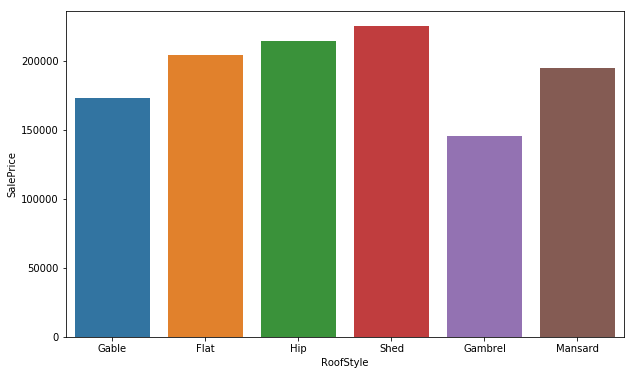

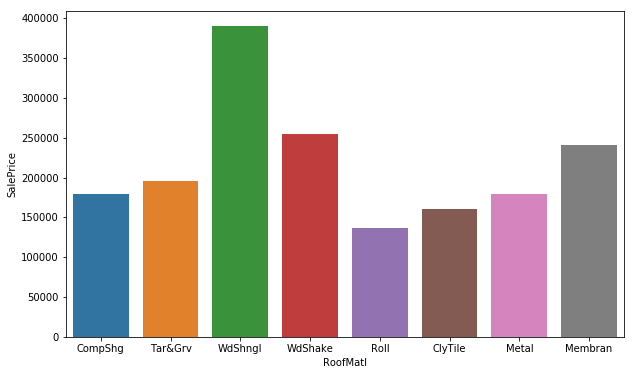

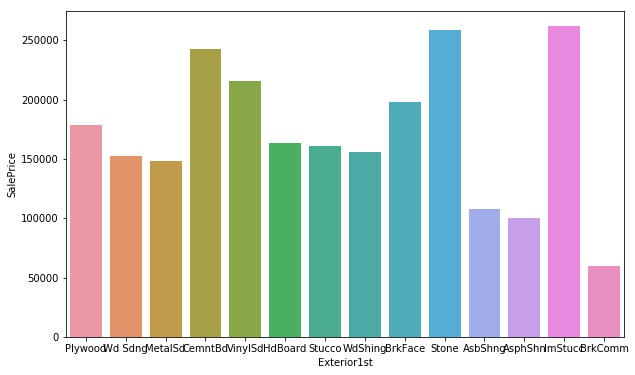

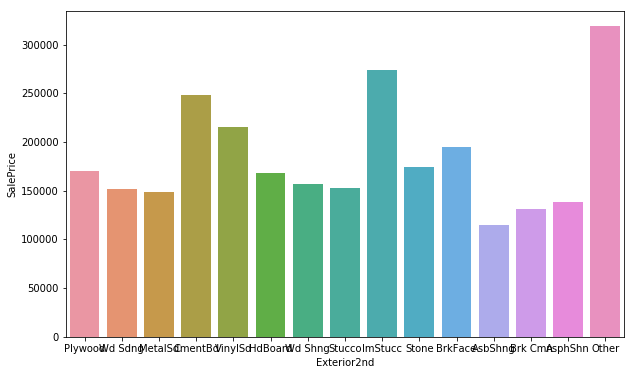

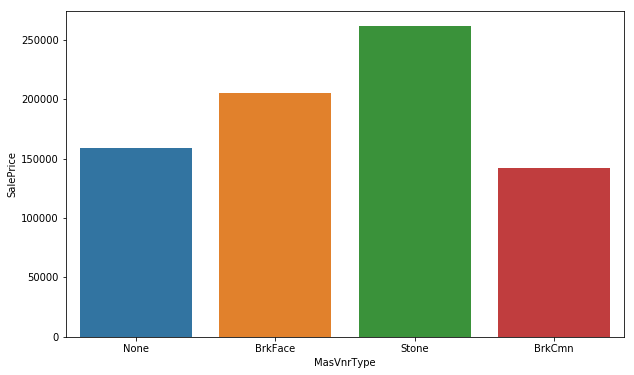

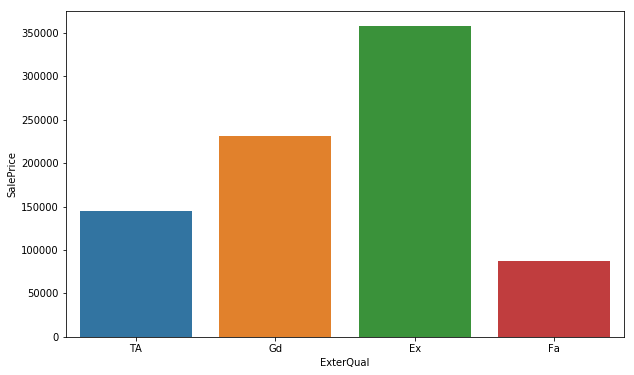

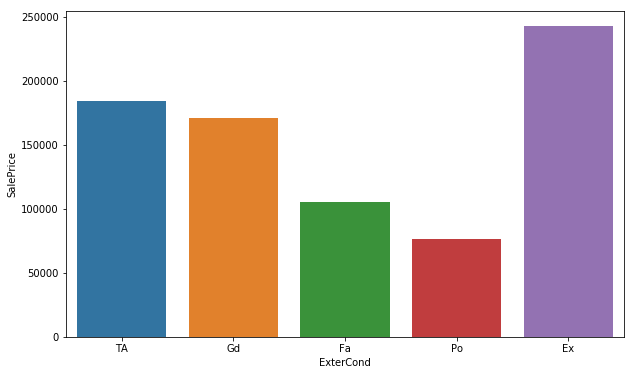

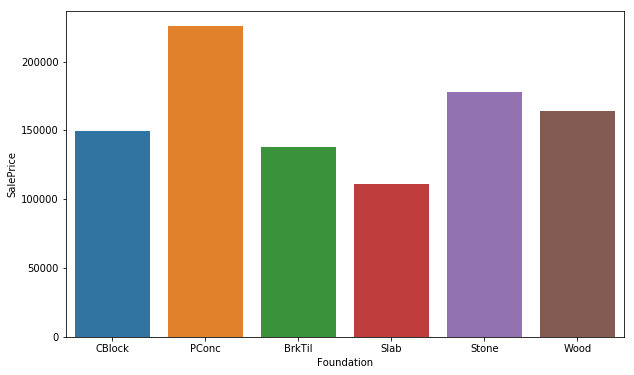

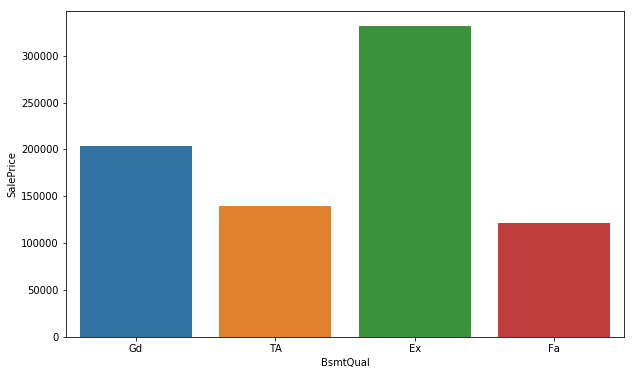

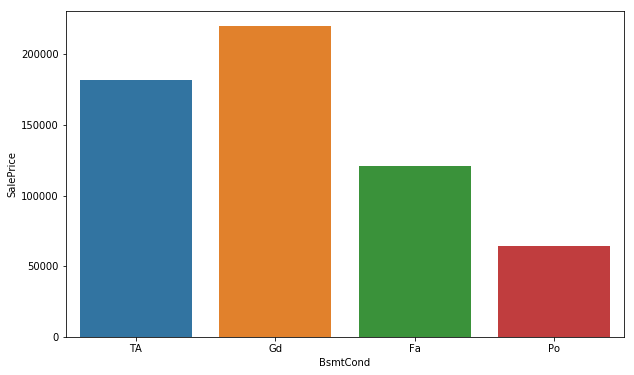

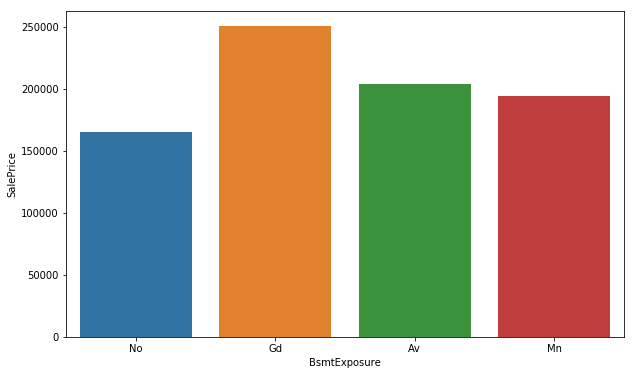

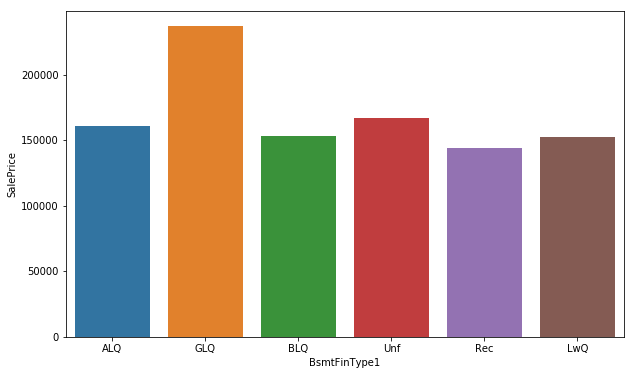

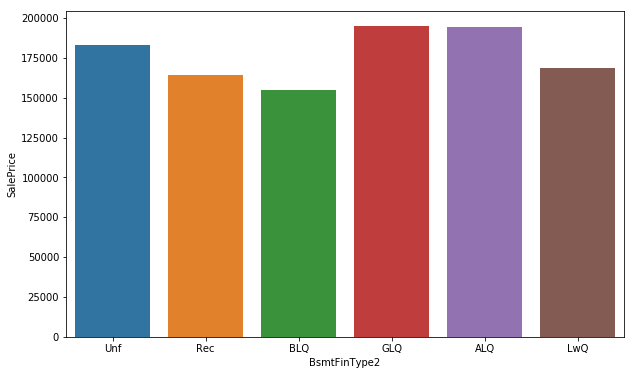

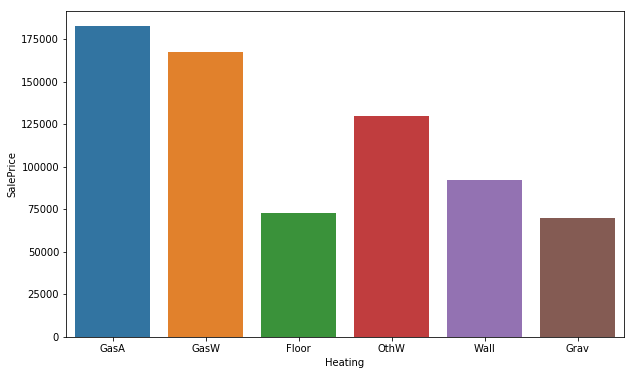

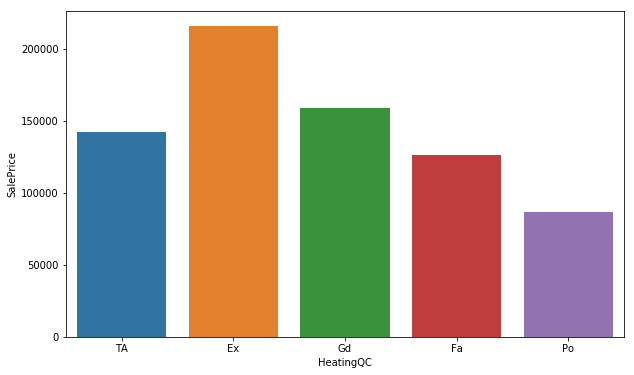

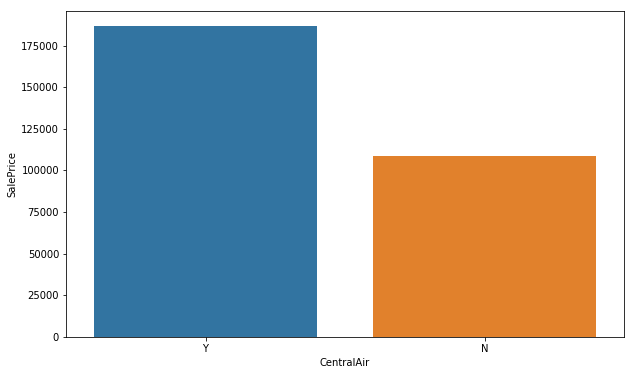

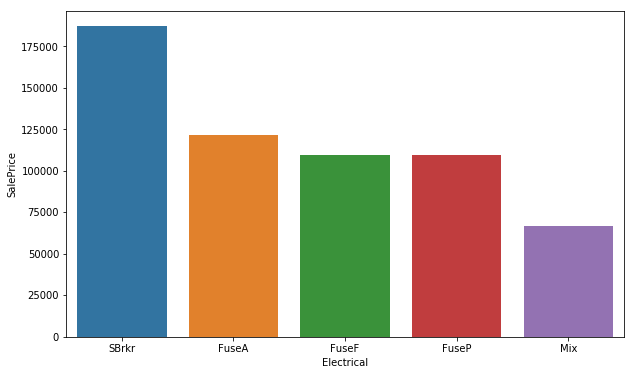

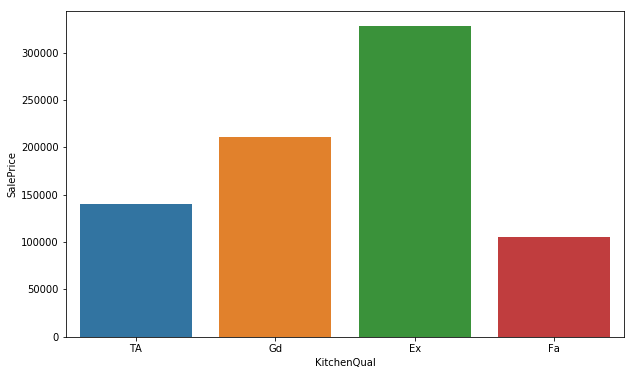

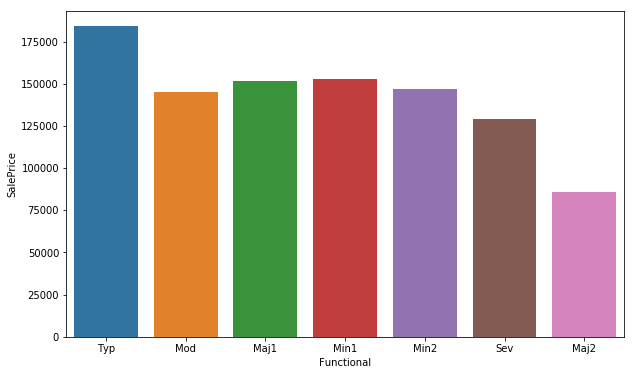

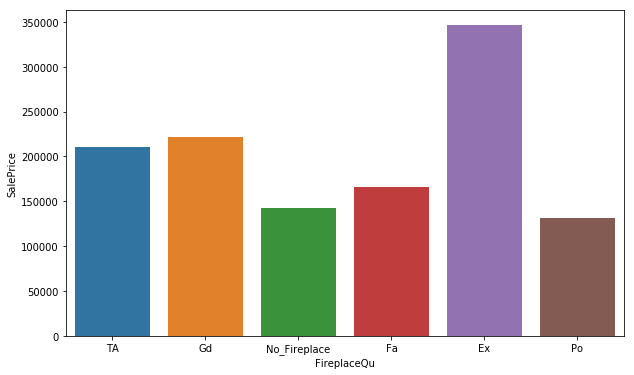

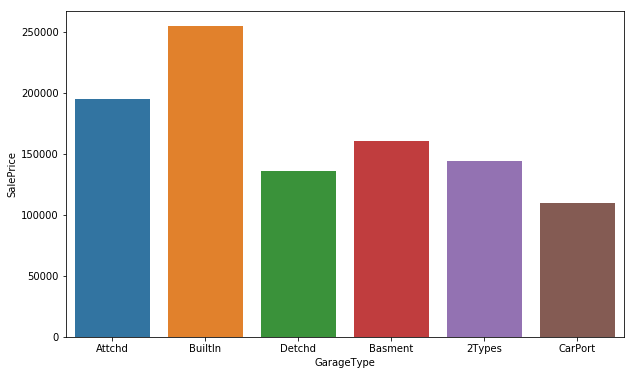

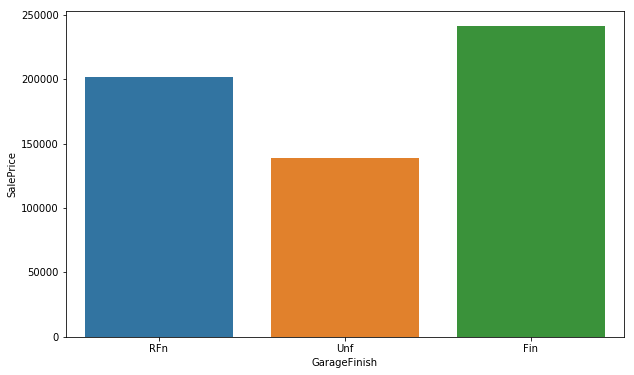

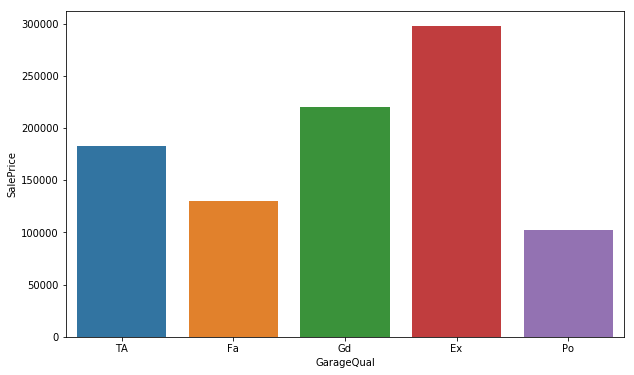

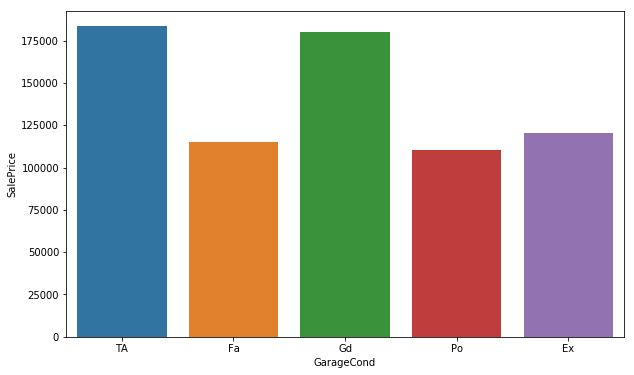

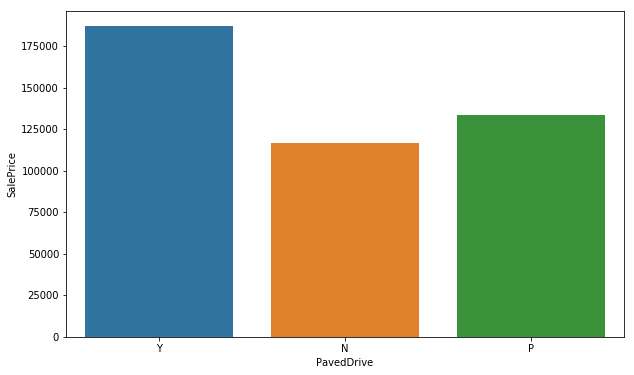

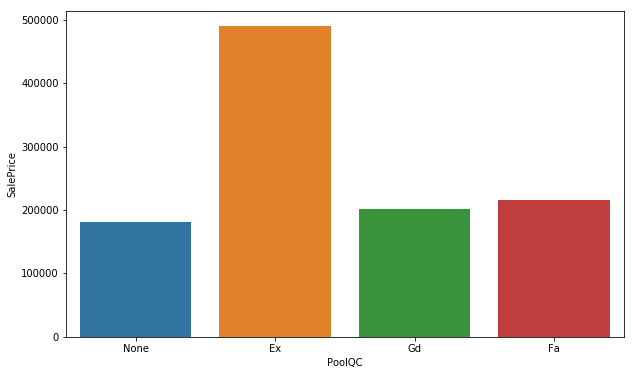

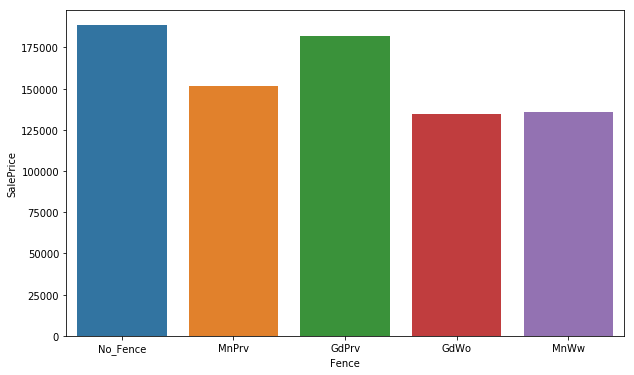

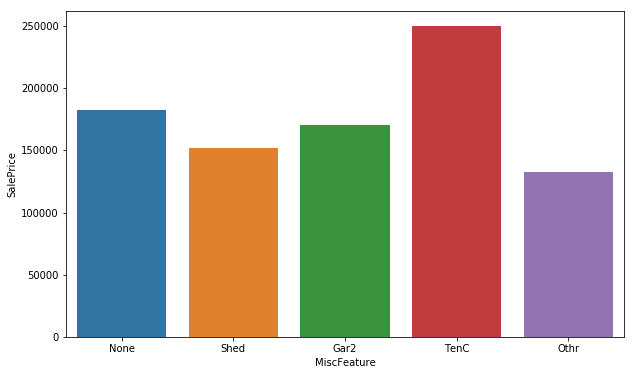

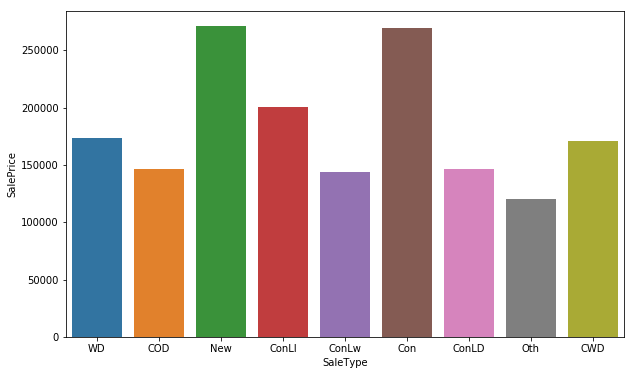

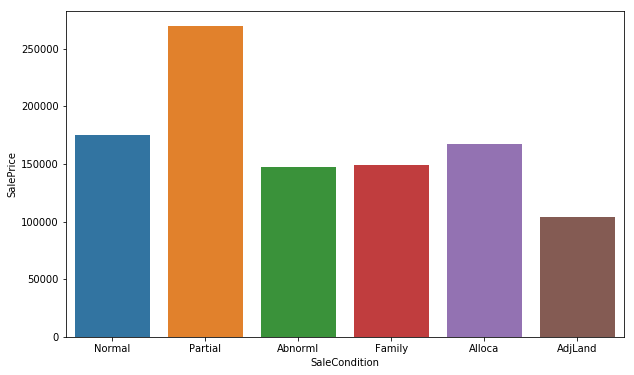

In [110]:
#Visualizing each categorical column with sale price
for i in categorical:
    plt.figure(figsize=(10,6))
    sn.barplot(x=df_train[i],y=df_train['SalePrice'],ci=None)
    plt.show()

### Observations:

- MSZoning:The avg sale price of the house is maximum in FV(Floating Village Residential) followed by RL(Residential Low Density) zone


- Street:The property that have access to paved road have much higher average sale price as compared to that with gravel street


- Alley:houses that do not have access to alley have higher sale price as compared to those with paved or gravel alley


- LotShape:sale price is not much affected by lotshape,however IR2(Moderately Irregular) have a bit higher price compared to other while Reg(Regular) have lowest avg sale price


- LandContour:Flatness of the property-:HLS(Hillside - Significant slope from side to side) have maximum average sale price & Bnk(Banked - Quick and significant rise from street grade to building) have miimum average sale price


- LandSlope: It doesn't affect the average sale price of house


- Neighborhood:The houses that has a neighbourhood of NoRidge(Northridge) has the maximum sale price followed by that with a neighbourhood of NridgHt(Northridge Heights)


- Condition1:house that is RRAn(Adjacent to North-South Railroad) has hightest avg sale price followed by PosA(Adjacent to postive off-site feature) while houses that is Artery(Adjacent to arterial street) has a minimum average sale price.


- BldgType: Type of dwelling-:TwnhsE(Townhouse End Unit) & 1Fam(Single-family Detached) type house have hightset selling price.


- HouseStyle: Style of dwelling-:The average sale price of 2.5Fin(Two and one-half story) is maximum followed by 2Story(Two story). 1.5Unf(One and one-half story: 2nd level unfinished) have lowest avg selling price


- RoofMatl: Roof material-:House with roof material WdShngl(Wood Shingles) have a very high average selling price,followed by that with roof of WdShake(Wood Shakes),while house with roof material Roll(Roll) have lowest sale price


- Exterior1st: Exterior covering on house-:House with exterior covering of ImStucc(Imitation Stucco) have maximum selling price while that with exterior coverng of BrkComm(Brick Common) have minimum average selling price


- ExterQual: Evaluates the quality of the material on the exterior-:Houses with exterior material of excellent quality have highest saelling price followed by that of gd(good) quality


- KitchenQual: Kitchen quality-:Houses with Ex(Excellent) kitchen quality have higher sale price while that with Fa(Fair) kitchen quality of lower selling price

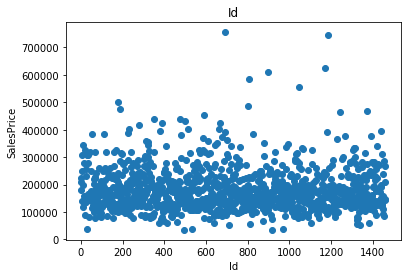

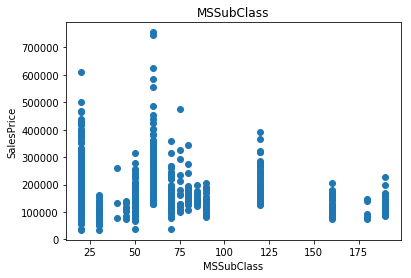

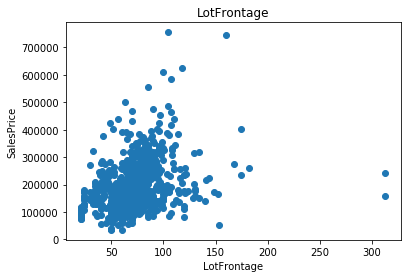

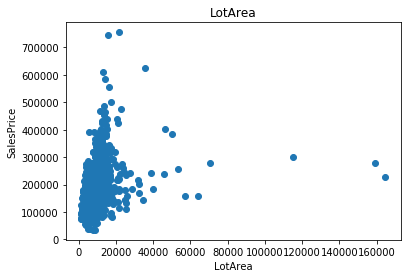

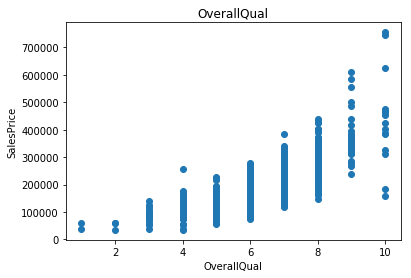

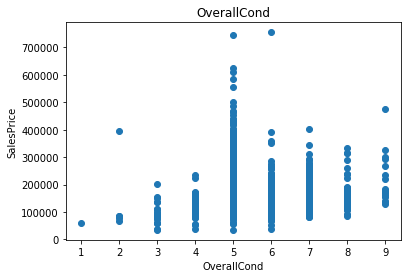

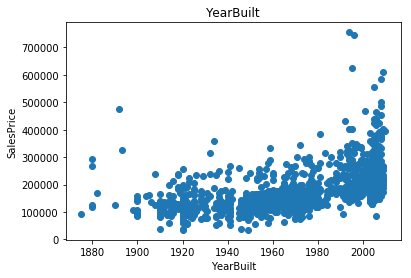

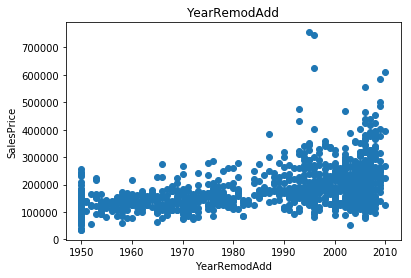

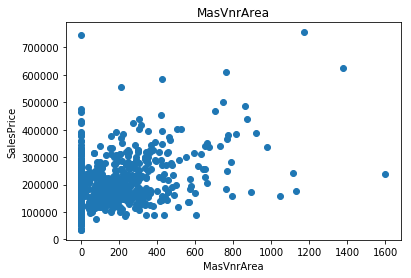

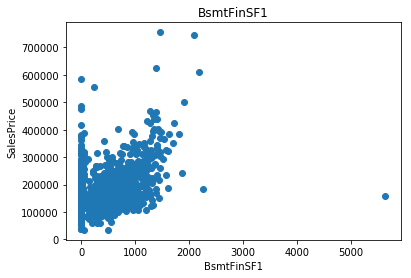

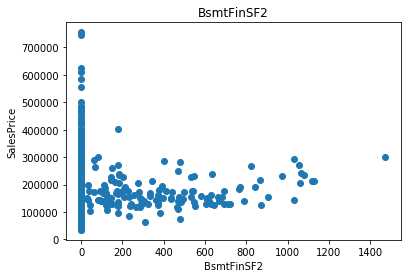

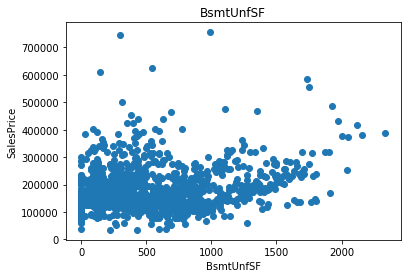

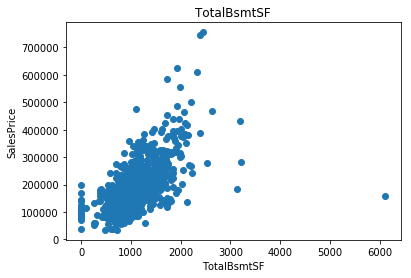

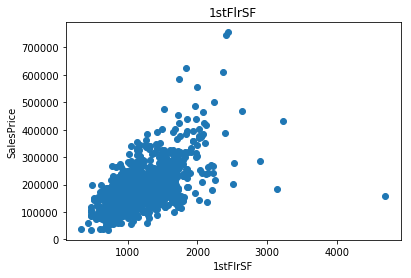

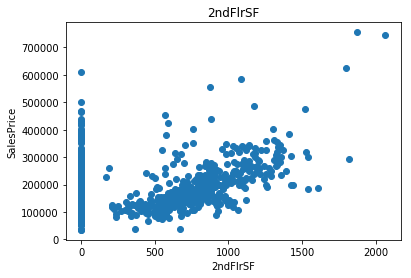

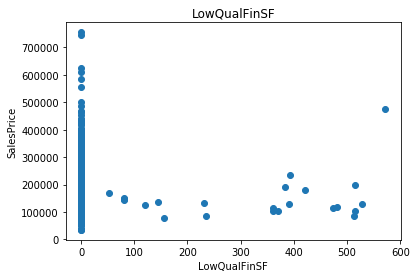

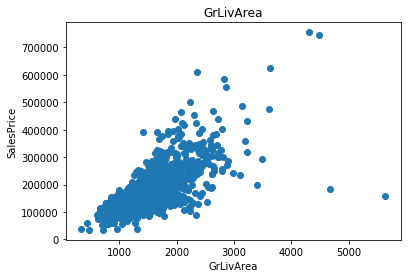

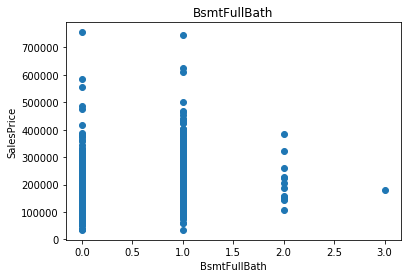

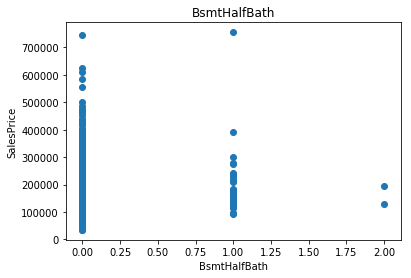

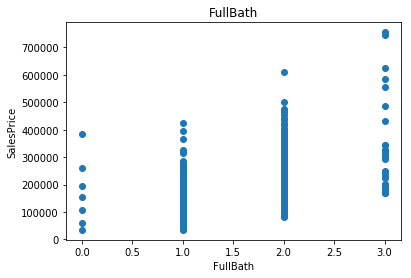

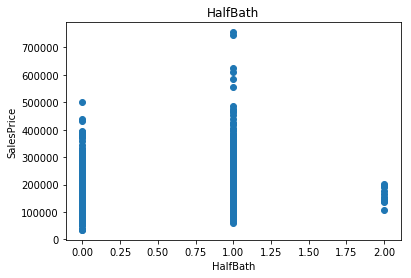

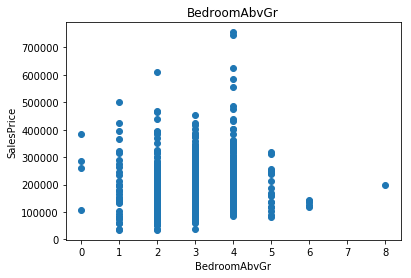

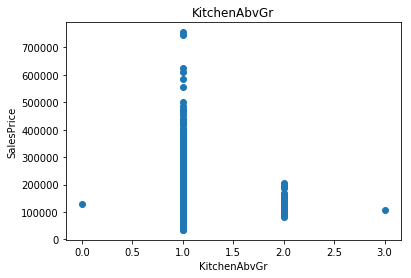

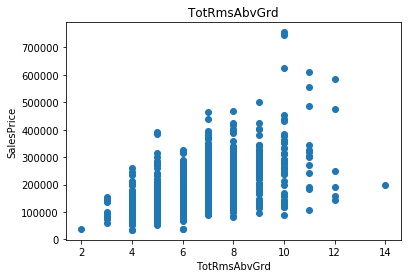

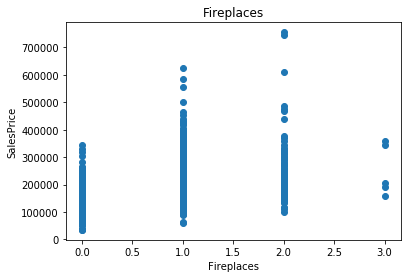

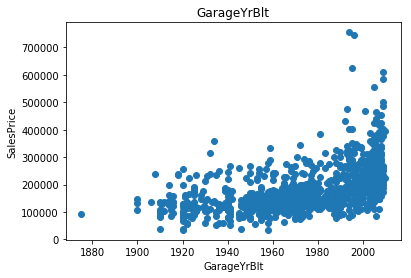

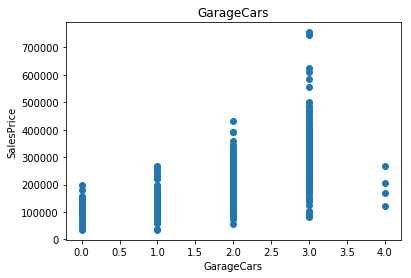

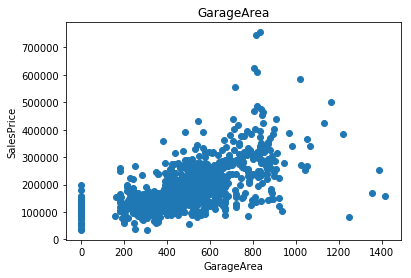

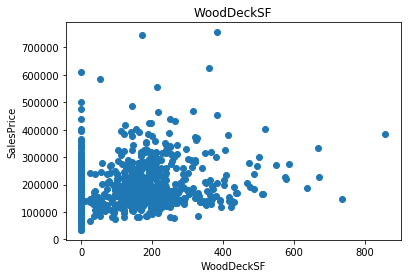

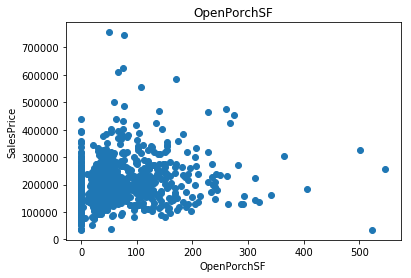

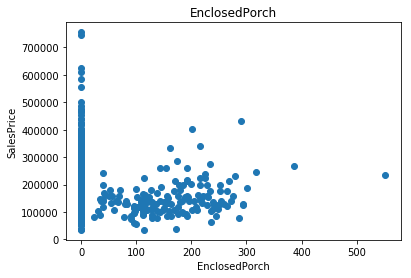

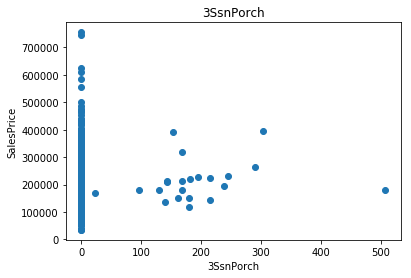

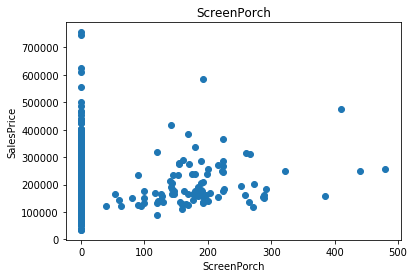

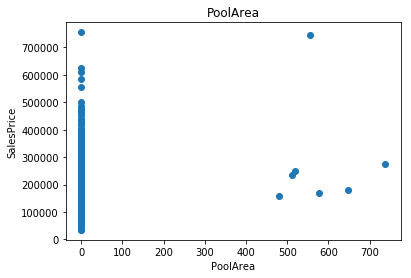

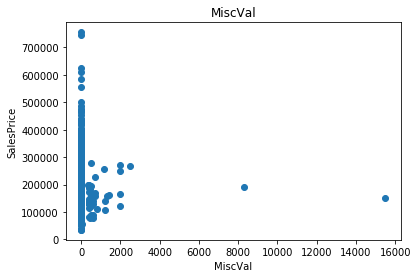

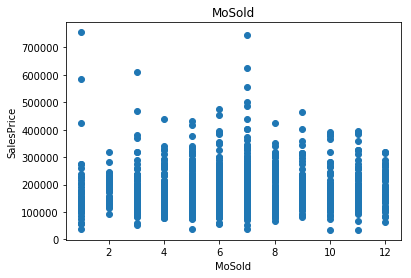

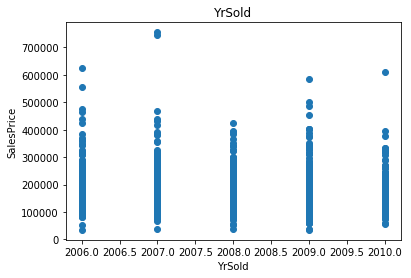

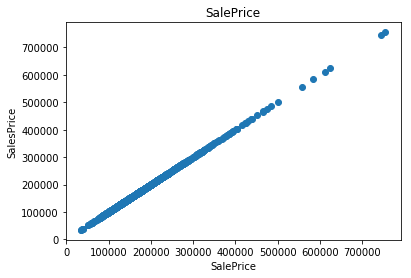

In [111]:
#Visualising sale price wrt to each continuous feature
for i in cont:
    plt.scatter(df_train[i],df_train['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalesPrice')
    plt.title(i)
    plt.show()

### Observations

- LotFrontage: Linear feet of street connected to property-: Lot frontage doed not impact much on sale price since houses with different sale price are having same Lot frontage area


- LotArea: Lot size in square feet-: LotArea doesn't affect sale price of the houses much, as can be seen different sale price are availble within the Lot area range of 0 to 20000.In fact some houses where Lot Area is very large have moderate sale price


- OverallQual: Rates the overall material and finish of the house-:Overall quality is directly proportional to the sale price of houses


- YearBuilt: & YearRemodAdd: Houses which are build latest have high sale price in comparison to those build in early years.similar is the case with remodelling date


- BsmtFinSF1: Type 1 finished square feet-:Total sq ft of basement area is directly proportional to sale price
  Houses with higher number of full bathrooms seems having high sale price

- Kitchen: Kitchens above grade-:houses with 1 kitchen above ground have high sale price in comparison to those having 2 kitchens


- Fireplaces: Number of fireplaces-:Houses with 1 and 2 fireplaces have higher prices in comparion to houses having 0 or 3 fireplaces


- Wood deck,Enclosed porch,Three season porch, screen porch,pool area,Miscval do not have impact on sale price.

### Multivariate Analysis

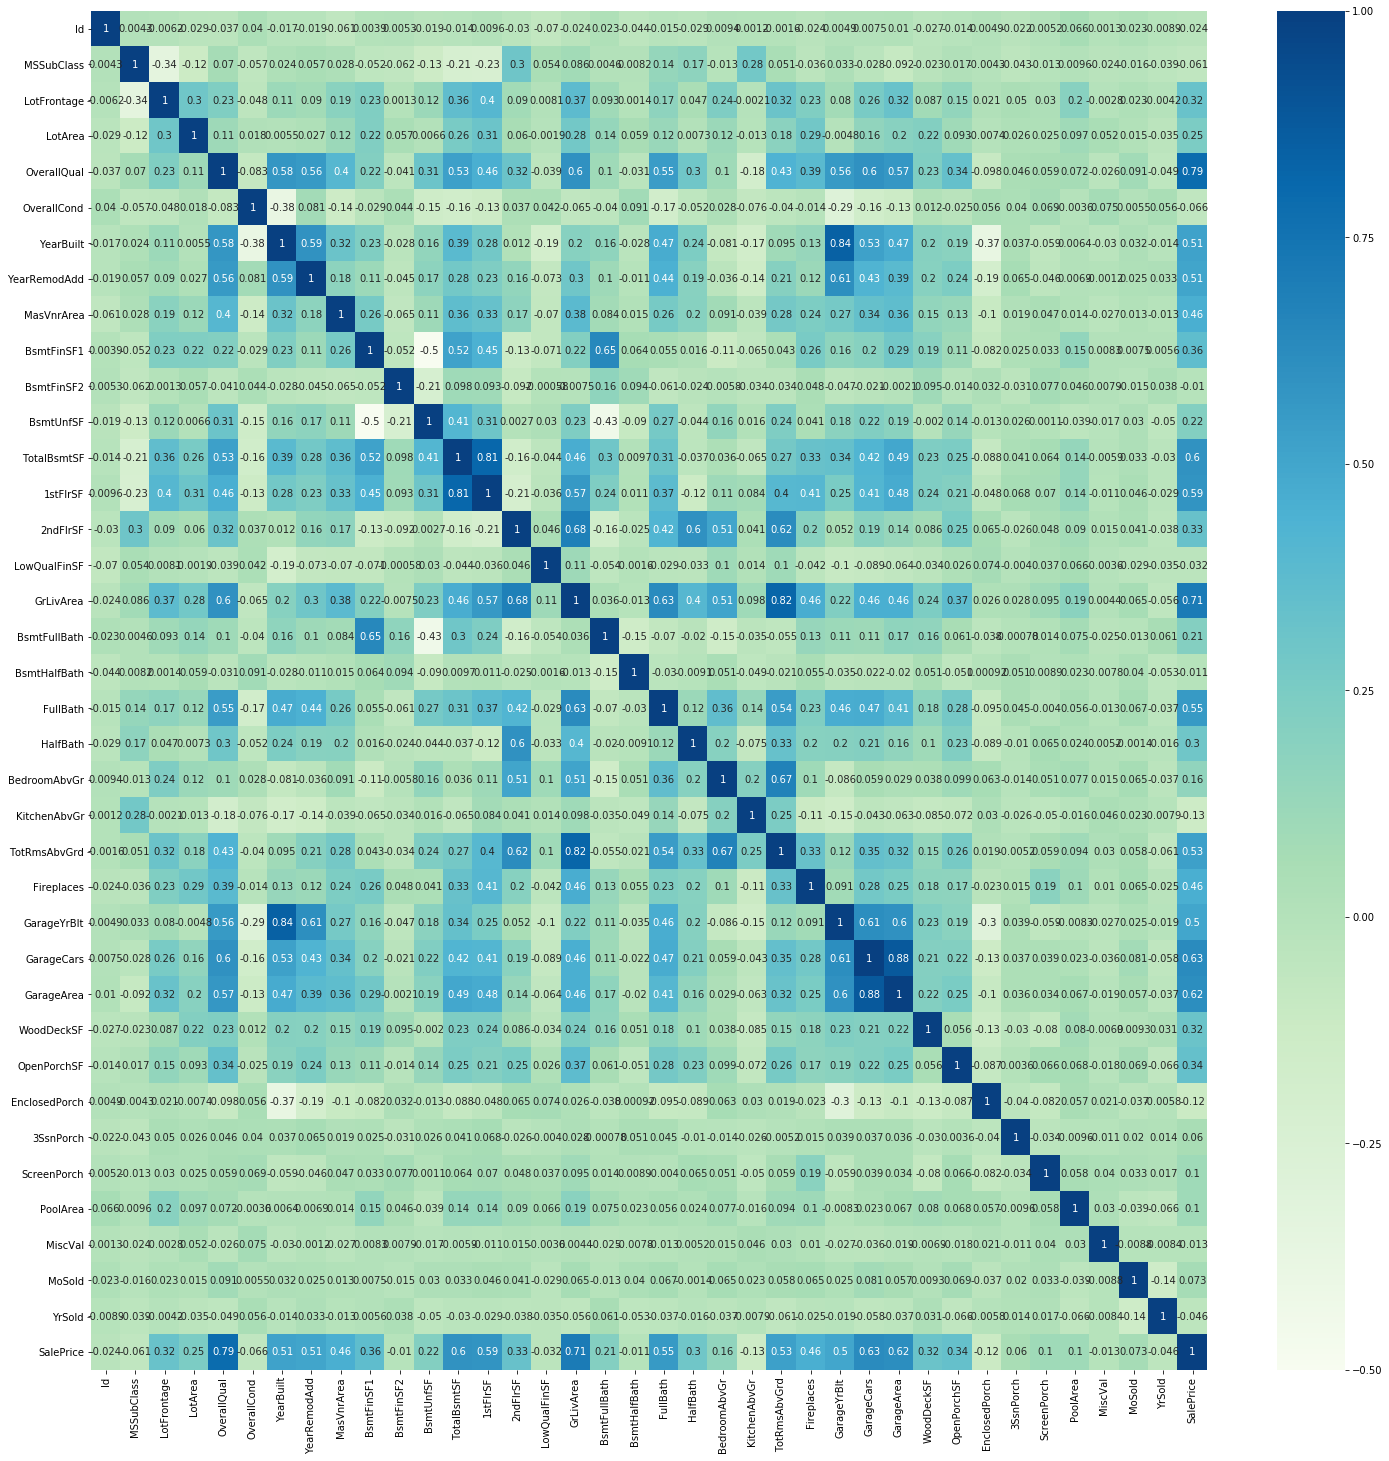

In [112]:
corr_hmap=df_train.corr()
plt.figure(figsize=(25,25))
sn.heatmap(corr_hmap,annot=True,cmap='GnBu')
plt.show()

### Observations



- SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.


- SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.


- We observe multicollinearity in between columns, so we will be using Principal Component Analysis(PCA).

### Checking correlation of all columns with target variables

Text(0.5, 1.0, 'Correaltion with target variable SalePrice')

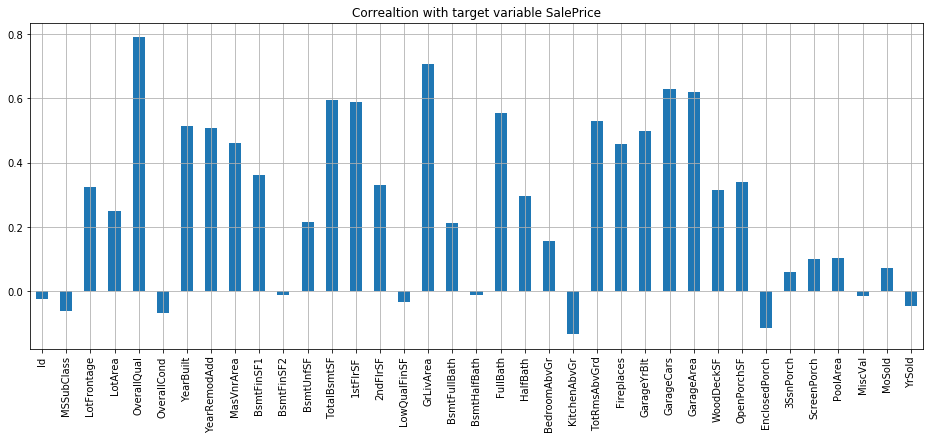

In [113]:
plt.figure(figsize=(16,6))
df_train.drop('SalePrice', axis=1).corrwith(df_train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("Correaltion with target variable SalePrice")

### Observations:

- 'id','MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'KitchenAbvGr' ,'YrSold', 'EnclosedPorch', 'MiscVal' are negatively correlated with the target column,rest all are positively correlated


- 'OverallQual' & 'GrLivArea' are highly positively correlated with target column


- 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column

In [114]:
#Dropping the least correlated and unecessary columns from the dataset
df_train.drop(['Id','PoolArea','Utilities','PoolQC','MSSubClass','LowQualFinSF' ,'BsmtHalfBath' ,'BsmtUnfSF' ,'YrSold', 'MiscVal',
               'MoSold', '3SsnPorch'],axis=1,inplace=True)

In [115]:
df_train.describe()    #Statistical summary of the dataset

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     70.807363   10484.749144     6.104452     5.595890  1970.930651   
std      22.440317    8957.442311     1.390153     1.124343    30.145255   
min      21.000000    1300.000000     1.000000     1.000000  1875.000000   
25%      60.000000    7621.500000     5.000000     5.000000  1954.000000   
50%      70.000000    9522.500000     6.000000     5.000000  1972.000000   
75%      79.250000   11515.500000     7.000000     6.000000  2000.000000   
max     313.000000  164660.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  TotalBsmtSF  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    1984.758562   101.696918   444.726027    46.647260  1061.095034   
std       20.785185   182.218483   462.664785   163.520016   442.272249   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1966.000000     0.000000     0.000000     0.000000   799.000000   
50%     1993.000000     0.000000   385.500000     0.000000  1005.500000   
75%     2004.000000   160.000000   714.500000     0.000000  1291.500000   
max     2010.000000  1600.000000  5644.000000  1474.000000  6110.000000   

          1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   1169.860445   348.826199  1525.066781      0.425514     1.562500   
std     391.161983   439.696370   528.042957      0.521615     0.551882   
min     334.000000     0.000000   334.000000      0.000000     0.000000   
25%     892.000000     0.000000  1143.250000      0.000000     1.000000   
50%    1096.500000     0.000000  1468.500000      0.000000     2.000000   
75%    1392.000000   729.000000  1795.000000      1.000000     2.000000   
max    4692.000000  2065.000000  5642.000000      3.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1976.287671     1.776541   476.860445    96.206336    46.559932   
std      26.376864     0.745554   214.466769   126.158988    66.381023   
min    1875.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   338.000000     0.000000     0.000000   
50%    1978.000000     2.000000   480.000000     0.000000    24.000000   
75%    2001.000000     2.000000   576.000000   171.000000    70.000000   
max    2010.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch  ScreenPorch      SalePrice  
count    1168.000000  1168.000000    1168.000000  
mean       23.015411    15.051370  181477.005993  
std        63.191089    55.080816   79105.586863  
min         0.000000     0.000000   34900.000000  
25%         0.000000     0.000000  130375.000000  
50%         0.000000     0.000000  163995.000000  
75%         0.000000     0.000000  215000.000000  
max       552.000000   480.000000  755000.000000

### Observations:

- Maximum standard deviation of 8957.44 is observed in LotArea column.


- Maximum SalePrice of a house observed is 755000 and minimum is 34900.


- In the columns MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.


- In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.


- In the columns MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.


### Label Encoding

In [116]:
c=list(df_train.select_dtypes(['object']))
len(c)

41

In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in c:
     df_train[i]=le.fit_transform(df_train[i].astype(str))

In [118]:
#Taking all continuous data and analyzing it
n=[x for x in df_train.columns if x not in c]

In [119]:
len(n)

28

### Plotting Distribution Plot

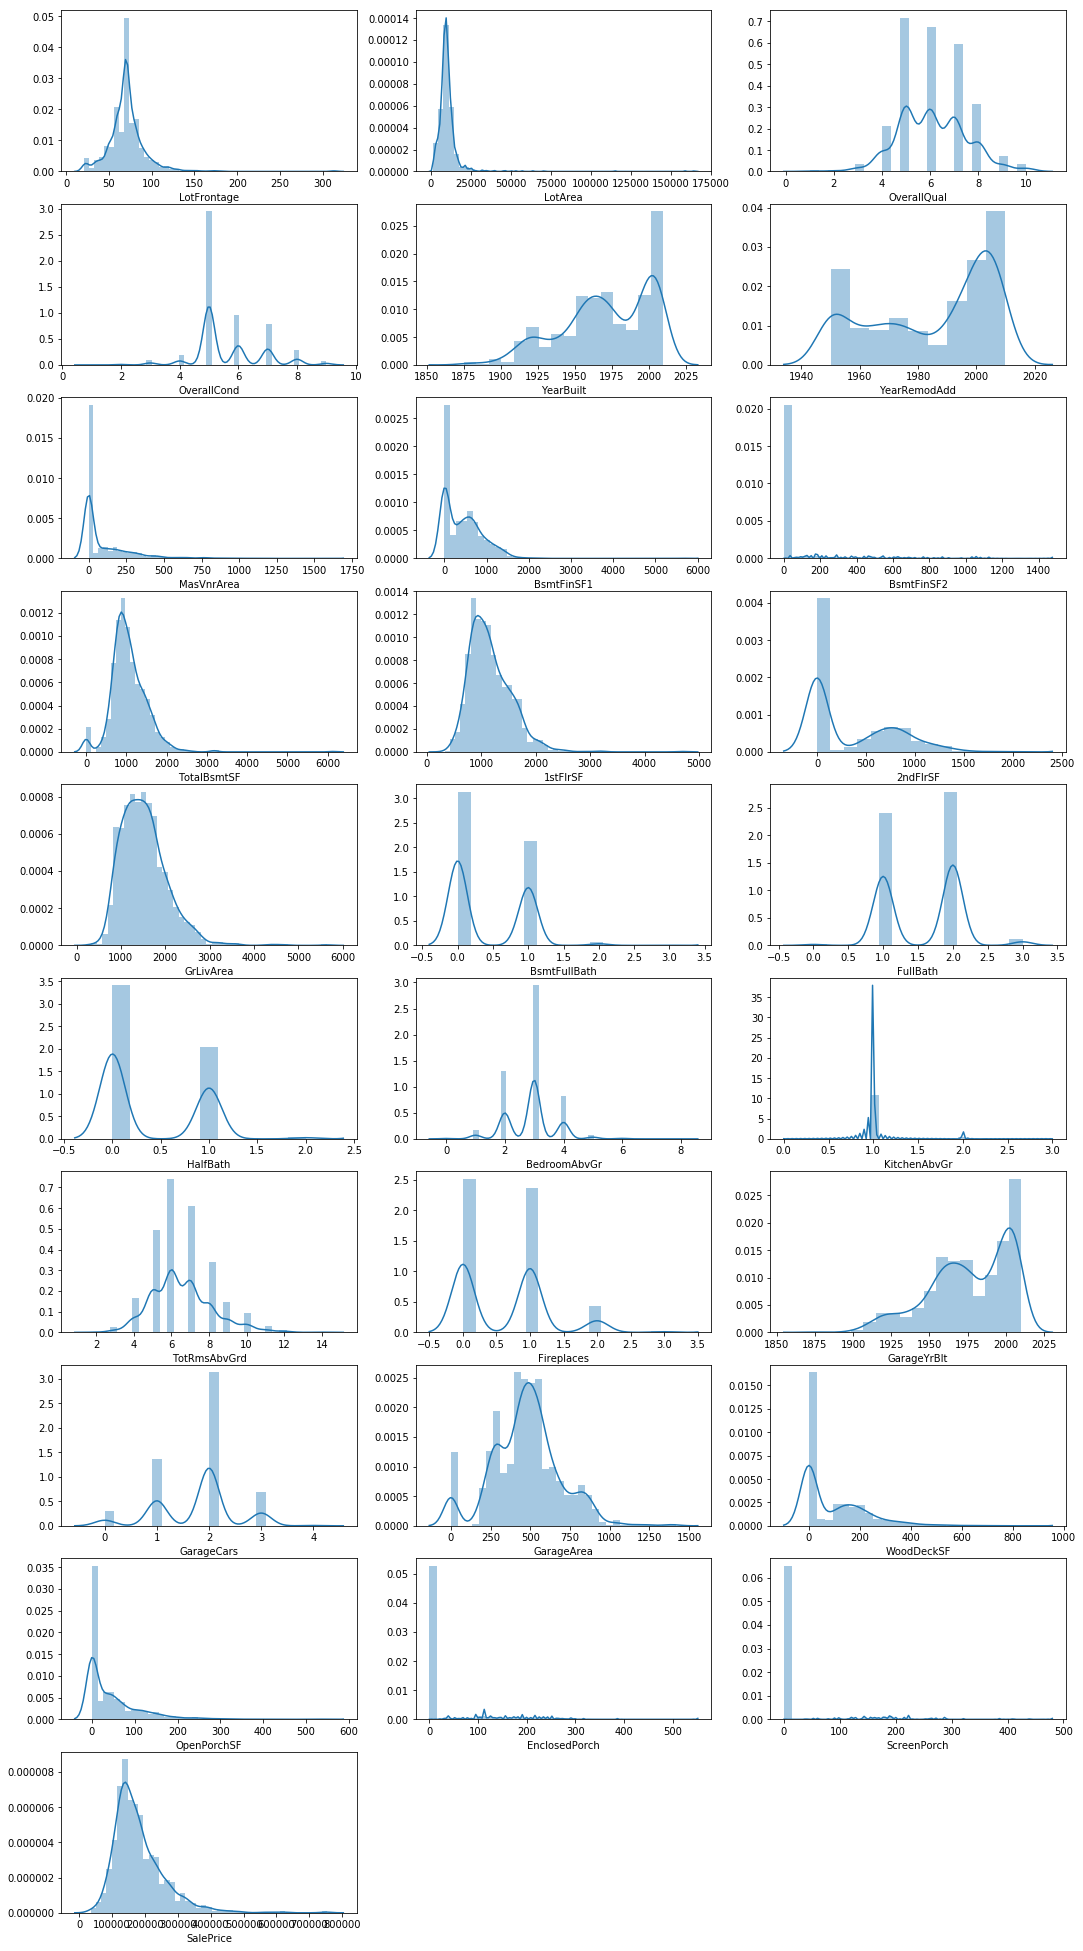

In [120]:
plt.figure(figsize=(18,35),facecolor='white')
plotnumber=1
for column in df_train[n]:
    if plotnumber<=28:
        ax=plt.subplot(10,3,plotnumber)
        sn.distplot(df_train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber=plotnumber+1
plt.show()

We can see that some of the curves are not normally distributed and it is due to the presence of high skewness and we need to handle them

### Plotting Box Plot

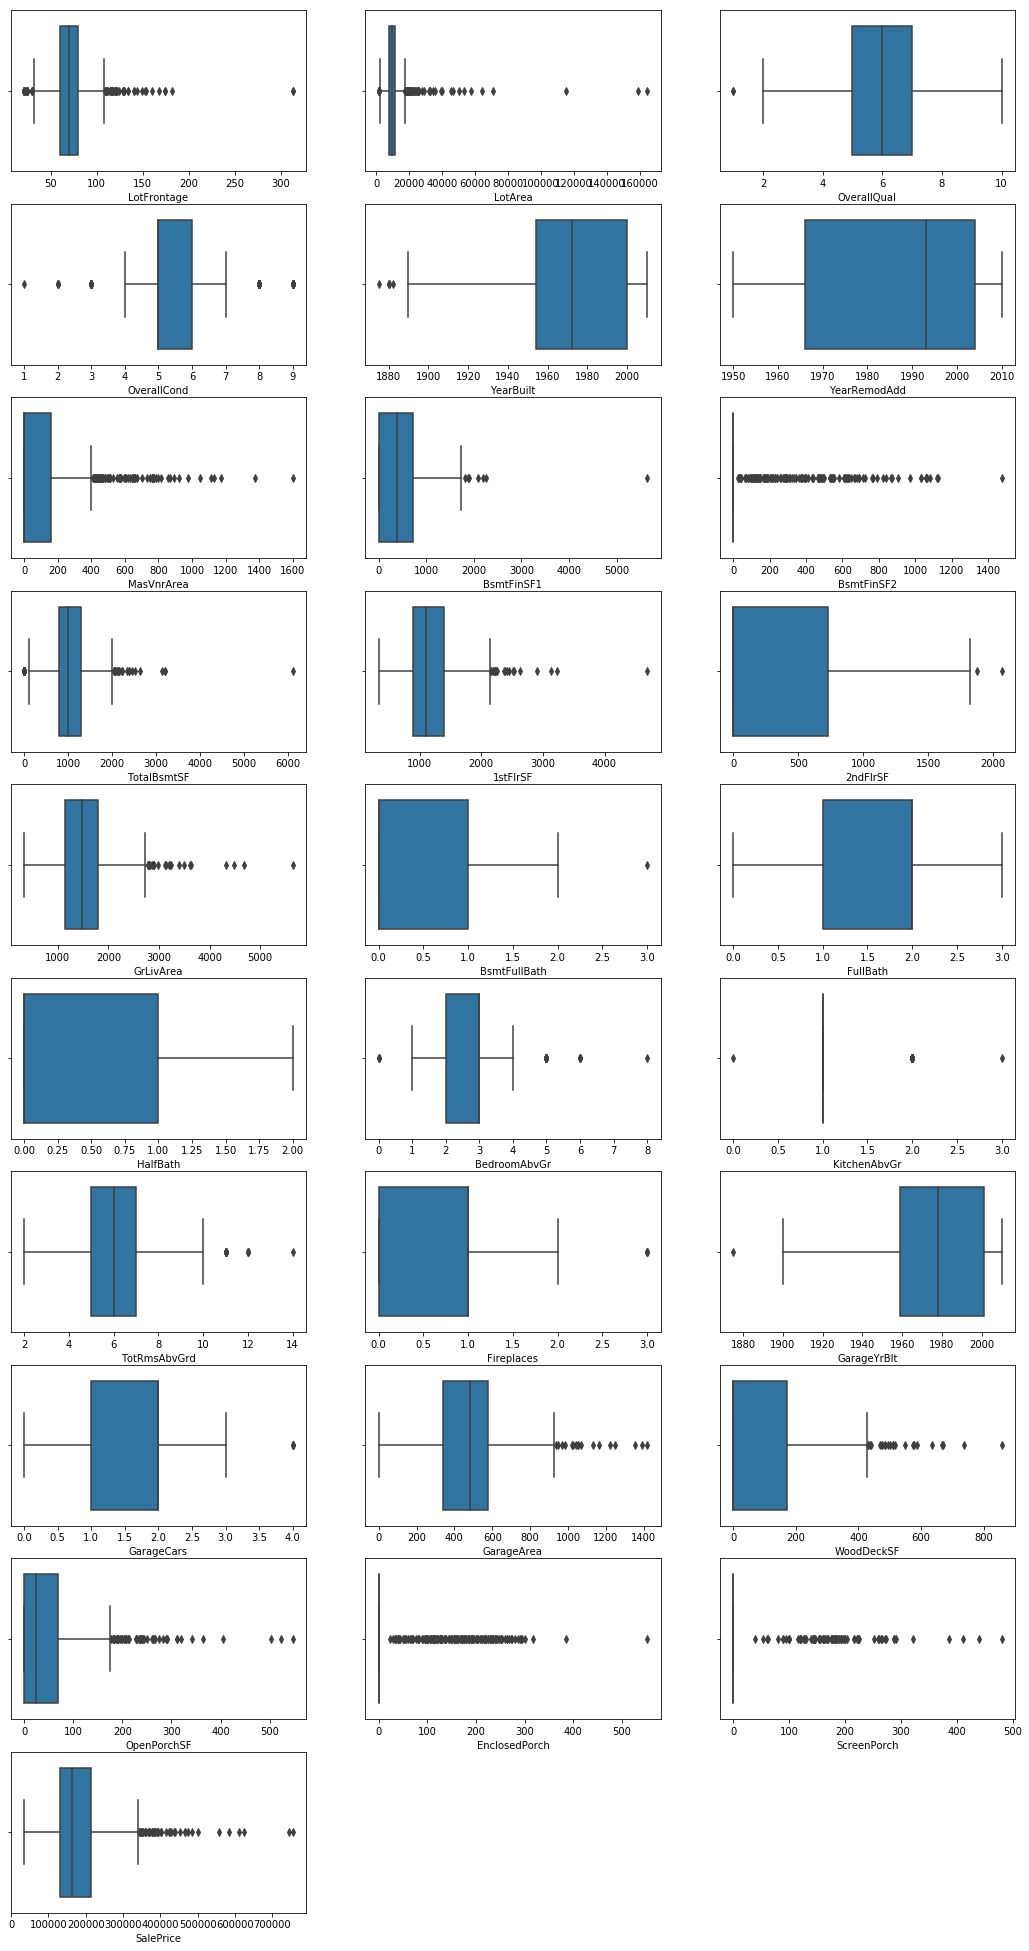

In [121]:
plt.figure(figsize=(18,35),facecolor='white')
plotnumber=1
for column in df_train[n]:
    if plotnumber<=28:
        ax=plt.subplot(10,3,plotnumber)
        sn.boxplot(df_train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber=plotnumber+1
plt.show()

We can see that there are outliers in the dataset and we can handle them by using z-score method

### Removing the Outliers

In [122]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
new_df=df_train[(z<6).all(axis=1)]

In [123]:
df_train.shape

(1168, 69)

In [124]:
new_df.shape

(1094, 69)

In [125]:
# Data loss percentage
Data_loss=(df_train.shape[0]-new_df.shape[0])/df_train.shape[0]*100
Data_loss

6.335616438356165

When we apply z-score of 3 , 57% of the data is lost (due to the wide spread of most of the data). We compromised by enlarging the z-score cut-off to 6 resulting in a loss of few data.

### Checking for Skewness

In [126]:
new_df[n].skew()

LotFrontage      0.702739
LotArea          2.175304
OverallQual      0.169620
OverallCond      0.635169
YearBuilt       -0.595320
YearRemodAdd    -0.529913
MasVnrArea       2.401138
BsmtFinSF1       0.734955
BsmtFinSF2       4.210673
TotalBsmtSF      0.524280
1stFlrSF         0.888983
2ndFlrSF         0.740088
GrLivArea        0.666477
BsmtFullBath     0.609605
FullBath         0.061767
HalfBath         0.631096
BedroomAbvGr     0.110161
KitchenAbvGr     4.686764
TotRmsAbvGrd     0.508963
Fireplaces       0.672733
GarageYrBlt     -0.692929
GarageCars      -0.308349
GarageArea       0.130056
WoodDeckSF       1.330938
OpenPorchSF      1.779680
EnclosedPorch    2.797243
ScreenPorch      3.768842
SalePrice        1.554161
dtype: float64

### Handling Skewness

In [127]:
#We are treating skewness by using square root transform
import numpy as np
for col in new_df.skew().index:
    if col in new_df.describe().columns:
        if new_df[col].skew()>0.55:
            new_df[col]=np.sqrt(new_df[col])
        if new_df[col].skew()<-0.55:
            new_df[col]=np.sqrt(new_df[col]) 

In [128]:
new_df[n].skew()

LotFrontage     -0.236465
LotArea          0.303167
OverallQual      0.169620
OverallCond      0.188468
YearBuilt       -0.608644
YearRemodAdd    -0.529913
MasVnrArea       1.015074
BsmtFinSF1      -0.094333
BsmtFinSF2       3.173370
TotalBsmtSF      0.524280
1stFlrSF         0.433817
2ndFlrSF         0.404040
GrLivArea        0.245465
BsmtFullBath     0.411839
FullBath         0.061767
HalfBath         0.509919
BedroomAbvGr     0.110161
KitchenAbvGr     4.686764
TotRmsAbvGrd     0.508963
Fireplaces       0.070219
GarageYrBlt     -0.705380
GarageCars      -0.308349
GarageArea       0.130056
WoodDeckSF       0.417320
OpenPorchSF      0.521206
EnclosedPorch    2.283606
ScreenPorch      3.362497
SalePrice        0.831539
dtype: float64

Now we can see that all the continious columns are between in range of -0.5 to 0.5.

### Splitting the data into input and target variable

In [129]:
from sklearn.model_selection import train_test_split
x=new_df.drop(columns=['SalePrice'])
y=new_df['SalePrice']

In [130]:
print(x.shape)
x.head()

(1094, 68)


MSZoning  LotFrontage     LotArea  Street  Alley  LotShape  LandContour  \
0  1.732051     8.366600   70.199715       1      1       0.0     1.732051   
2  1.732051     9.591663   99.599197       1      1       0.0     1.732051   
3  1.732051    10.246951  108.402030       1      1       0.0     1.732051   
4  1.732051     8.366600  128.976742       1      1       0.0     1.732051   
5  1.732051     7.615773  118.549568       1      1       0.0     1.732051   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0   2.000000        0.0            13    1.189207    1.414214       2.0   
2   1.000000        0.0            15    1.189207    1.414214       0.0   
3   2.000000        0.0            14    1.189207    1.414214       0.0   
4   1.414214        0.0            14    1.189207    1.414214       0.0   
5   2.000000        0.0             8    1.189207    1.414214       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            6     2.236068  44.452222          1976   1.000000   
2           5            7     2.236068  44.676616          1997   1.000000   
3           2            6     2.449490  44.463468          1977   1.732051   
4           2            6     2.645751  44.463468          2000   1.000000   
5           5            7     2.236068  44.788391          2006   1.000000   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       1.0     2.828427     3.000000           2    0.000000   1.732051   
2       1.0     2.645751     2.645751           2    0.000000   1.414214   
3       1.0     2.828427     3.000000           1   21.908902   1.732051   
4       1.0     2.000000     2.000000           3   11.224972   1.414214   
5       1.0     3.316625     3.464102           2    0.000000   1.414214   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        2.0           1  1.414214  1.732051      1.732051             0   
2        2.0           2  1.414214  1.732051      0.000000             2   
3        2.0           1  1.414214  1.732051      1.732051             1   
4        2.0           1  1.414214  1.732051      1.732051             0   
5        2.0           2  1.414214  1.732051      0.000000             5   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  TotalBsmtSF  Heating  HeatingQC  \
0   10.954451      2.236068         0.0         1078      1.0          4   
2   29.359837      2.236068         0.0         1117      1.0          0   
3   26.551836      2.236068         0.0         1844      1.0          0   
4   35.298725      2.236068         0.0         1602      1.0          2   
5    0.000000      2.236068         0.0          879      1.0          0   

   CentralAir  Electrical   1stFlrSF   2ndFlrSF  GrLivArea  BsmtFullBath  \
0         1.0         2.0  30.951575   0.000000  30.951575           0.0   
2         1.0         2.0  33.570821  29.765752  44.866469           1.0   
3         1.0         2.0  42.941821   0.000000  42.941821           0.0   
4         1.0         2.0  40.024992   0.000000  40.024992           0.0   
5         1.0         2.0  29.647934  31.368774  43.162484           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2       0.0             2           1.0     1.732051             5   
2         2       1.0             3           1.0     1.732051             8   
3         2       0.0             3           1.0     1.732051             7   
4         2       0.0             3           1.0     1.414214             8   
5         2       1.0             4           1.0     1.414214             9   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0     2.44949         1.0            5    1.000000    44.463468             1   
2     2.44949         1.0            5    1.000000    44.687806             2   
3     2.44949         1.0            5    1.000000    44

In [131]:
print(y.shape)
y.head()

(1094,)


0    357.770876
2    519.413130
3    435.889894
4    463.680925
5    468.198676
Name: SalePrice, dtype: float64

### Using Standard Scaler

In [132]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(new_df)
x=pd.DataFrame(x,columns=new_df.columns)
x

MSZoning  LotFrontage   LotArea  Street     Alley  LotShape  \
0     0.046859     0.074891 -1.267268     0.0  0.014254 -1.434077   
1     0.046859     1.102598  0.160204     0.0  0.014254 -1.434077   
2     0.046859     1.652320  0.587620     0.0  0.014254 -1.434077   
3     0.046859     0.074891  1.586611     0.0  0.014254 -1.434077   
4     0.046859    -0.554979  1.080327     0.0  0.014254 -1.434077   
5     0.046859     0.074891  0.494983     0.0  0.014254 -1.434077   
6     0.046859     0.925731  0.886829     0.0  0.014254  0.718994   
7     0.046859     0.074891 -0.026200     0.0  0.014254  0.718994   
8     0.046859     0.559501 -0.204550     0.0  0.014254  0.718994   
9     1.214278    -1.011933 -0.173025     0.0  0.014254  0.718994   
10    0.046859    -1.379220  0.068663     0.0  0.014254 -1.434077   
11    0.046859     2.584227 -0.019613     0.0  0.014254 -1.434077   
12    0.046859     0.559501 -0.097221     0.0  0.014254 -1.434077   
13    0.046859    -0.500138  1.554720     0.0  0.014254 -1.434077   
14    0.046859    -0.722403  0.321319     0.0  0.014254  0.718994   
15    1.214278     0.074891 -0.949401     0.0  0.014254  0.718994   
16    0.046859    -0.232651 -0.523308     0.0  0.014254  0.718994   
17    0.046859     0.074891 -0.355524     0.0  0.014254 -1.434077   
18    1.214278    -2.834101 -2.495685     0.0  0.014254  0.718994   
19    0.046859     0.559501  0.738639     0.0  0.014254  0.718994   
20    0.046859     0.074891 -0.213786     0.0  0.014254  0.718994   
21    0.046859     0.074891  0.337099     0.0  0.014254 -1.434077   
22    0.046859     0.124847 -0.011013     0.0  0.014254  0.718994   
23    0.046859     0.074891  2.360423     0.0  0.014254  0.718994   
24    0.046859     0.074891  3.053222     0.0  0.014254  0.718994   
25    0.046859     0.925731  0.507051     0.0  0.014254  0.718994   
26    1.214278    -0.554979 -0.797496     0.0  0.014254  0.718994   
27    0.046859     0.272641  0.640432     0.0  0.014254 -1.434077   
28    0.046859    -0.391832 -0.426779     0.0  0.014254  0.718994   
29    1.214278    -0.445760 -1.853763     0.0 -3.884147  0.718994   
...        ...          ...       ...     ...       ...       ...   
1064  0.046859     0.272641 -0.184558     0.0  0.014254  0.718994   
1065  0.046859     0.024577  0.229181     0.0  0.014254 -1.434077   
1066  0.046859    -0.445760  0.212088     0.0  0.014254  0.718994   
1067  0.046859     1.014656  0.576186     0.0  0.014254  0.718994   
1068  0.046859    -1.011933 -0.329681     0.0  0.014254  0.718994   
1069  0.046859     1.058748  1.131094     0.0  0.014254 -1.434077   
1070  0.046859    -0.128595 -0.058764     0.0  0.014254  0.718994   
1071  0.046859     1.189589  0.031749     0.0  0.014254  0.718994   
1072  1.214278    -0.445760 -0.194017     0.0 -3.884147  0.718994   
1073  1.214278    -3.099533 -2.564911     0.0  0.014254  0.718994   
1074  0.046859     0.321238  0.209917     0.0  0.014254  0.718994   
1075  0.046859    -0.445760  0.370146     0.0  0.014254  0.718994   
1076  0.046859     0.559501  0.608407     0.0  0.014254 -1.434077   
1077  0.046859     0.074891 -0.315871     0.0  0.014254  0.718994   
1078  1.214278    -1.841024 -1.442254     0.0  0.014254  0.718994   
1079  0.046859     0.074891 -0.314519     0.0  0.014254 -1.434077   
1080  0.046859     0.835790  0.314238     0.0  0.014254  0.718994   
1081  0.046859    -0.445760  0.115637     0.0  0.014254  0.718994   
1082  1.214278    -0.952908 -0.877342     0.0  0.014254  0.718994   
1083  1.214278     0.559501 -0.187184     0.0  0.014254  0.718994   
1084  0.046859     0.074891  0.474196     0.0  0.014254 -1.434077   
1085  0.046859    -1.507160 -0.412101     0.0  0.014254 -1.434077   
1086  0.046859    -0.836567 -1.588461     0.0  0.014254  0.718994   
1087  0.046859     0.074891  0.361261     0.0  0.014254 -1.434077   
1088  0.046859    -1.316340 -0.275771     0.0 -3.884147  0.718994   
1089  0.046859     0.074891  0.135523     0.0  0.014254 -1.434077   
1090

###  Prinicipal Component Analysis(PCA)

In [133]:
# PCA is required for the analysis to reduce curse of Dimensionality & at the same time minimizing information loss 
from sklearn.decomposition import PCA
for i in range(20,50):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

20  variance :0.6478817444963749
21  variance :0.6627024807235036
22  variance :0.6774534614116074
23  variance :0.6918442703213641
24  variance :0.7058579407346114
25  variance :0.7191207015571612
26  variance :0.7327072719421299
27  variance :0.7450154950122386
28  variance :0.7572804333816021
29  variance :0.7691159720691735
30  variance :0.780503717590432
31  variance :0.7919309697828808
32  variance :0.8033234767614528
33  variance :0.813969928512591
34  variance :0.8245005429226826
35  variance :0.8343466152908746
36  variance :0.8440643853765972
37  variance :0.8532466477301943
38  variance :0.8619880057056413
39  variance :0.8712988335593095
40  variance :0.8798392920702656
41  variance :0.8878543223377975
42  variance :0.8958886185684208
43  variance :0.9032583951026973
44  variance :0.9101327201011215
45  variance :0.9171330114813131
46  variance :0.9235545176958223
47  variance :0.9295197692792074
48  variance :0.9353933942429821
49  variance :0.9411007684733365


In [134]:
#As 49 has the highest value, we will select that
pca = PCA(n_components=49)
x=pca.fit_transform(x)

### Building the model

In [135]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### FInding the best random state

In [136]:
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.9497570952326001 on random state 183


We can see that at random_state=183, the best r2_score is obtained so that we can create our train_test_split with this random state.

### Create a train test split

In [137]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=183,test_size=.20)

### Applying different models or algorithms to the dataset

#### 1.Linear Regresssion

In [138]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.9497570952326001
Mean absolute error :  15.044633639404639
Mean Squared error : 387.9502837690492
Cross validation score is  0.9160677896537187


#### 2.Support Vector Regression

In [139]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR()
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.4657256923997919
Mean absolute error :  41.161142816834726
Mean Squared error : 4125.395818645046
Cross validation score is  0.434962992172775


#### 3. K Nearest Neighbor Regressor

In [140]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.9101847806074651
Mean absolute error :  19.83996866154931
Mean Squared error : 693.507670613856
Cross validation score is  0.8221110880626664


#### 4. Decision Tree Regressor 

In [141]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x,y)
y_pred=dtr.predict(x_test)
dtr_score=r2_score(y_test,y_pred)
print("R2 score using Decision Tree Regression is",dtr_score)
dtr_cv=cross_val_score(dtr,x,y,scoring='r2',cv=5).mean()
dtr_mae=mean_absolute_error(y_test,y_pred)
print('Mean Absoulte Error: ',dtr_mae)
dtr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',dtr_mse)
print('Cross validation score ',dtr_cv)

R2 score using Decision Tree Regression is 1.0
Mean Absoulte Error:  5.191179804640001e-16
Mean Squared Error:  2.950844080169191e-29
Cross validation score  0.7671285028997866


#### 5.Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.9290261796925162
Mean absolute error :  17.32257880830307
Mean Squared error : 548.0239221026775
Cross validation score is  0.8789184188299398


#### 6.Gradient Boosting Regressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
gbr_score=r2_score(y_test,y_pred)
print('R2 score from Gradient Boosting Regressor is',gbr_score)
gbr_cv=cross_val_score(gbr,x,y,scoring='r2',cv=5).mean()
gbr_mae=mean_absolute_error(y_test,y_pred)
print('Mean Abosolute Error: ',gbr_mae)
gbr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error is ',gbr_mse)
print('Cross validation score is ',gbr_cv)

R2 score from Gradient Boosting Regressor is 0.938665530096367
Mean Abosolute Error:  16.753948028808818
Mean Squared Error is  473.5937365503954
Cross validation score is  0.8966202633306578


In [144]:
model=['Linear Regression','Support Vector Regressor','K Neighbors Regressor','Decision Tree Regressot','Random Forest Regressor','Gradient Boosting Regressor']
acc=[lr_score*100,svr_score*100,knn_score*100,dtr_score*100,rfr_score*100,gbr_score*100]
mae=[lr_mae,svr_mae,knn_mae,dtr_mae,rfr_mae,gbr_mae]
mse=[lr_mse,svr_mse,knn_mse,dtr_mse,rfr_mse,gbr_mse]
cv_score=[lr_cv*100,svr_cv*100,knn_cv*100,dtr_cv*100,rfr_cv*100,gbr_cv*100]

result=pd.DataFrame({'Model':model,'R2_score':acc,'Mean Absolute Error':mae,'Mean Squared Error':mse,'Cross validation_score':cv_score})
result.index=np.arange(1,len(model)+1)
result
# Creting dataframe to store R2_score,Mae and cv score of all the models.

Model    R2_score  Mean Absolute Error  \
1            Linear Regression   94.975710         1.504463e+01   
2     Support Vector Regressor   46.572569         4.116114e+01   
3        K Neighbors Regressor   91.018478         1.983997e+01   
4      Decision Tree Regressot  100.000000         5.191180e-16   
5      Random Forest Regressor   92.902618         1.732258e+01   
6  Gradient Boosting Regressor   93.866553         1.675395e+01   

   Mean Squared Error  Cross validation_score  
1        3.879503e+02               91.606779  
2        4.125396e+03               43.496299  
3        6.935077e+02               82.211109  
4        2.950844e-29               76.712850  
5        5.480239e+02               87.891842  
6        4.735937e+02               89.662026

We can see that Linear Regression and Gradient Bossting Regression algorithms are performing well, as compared to other algorithms. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase their scores.

### Applying hyperparamter to the best accuracy model

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
#Linear Regression
parameters={'fit_intercept':[True,False],
               'normalize':[True,False],
               'copy_X':[True,False],
                'n_jobs':[-1,1,2,3,4,5,6]
           }

In [147]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [148]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 2, 3, 4, 5, 6],
                         'normalize': [True, False]})

In [149]:
# After tuning the parameter it provides the best parameter values
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}

In [150]:
# Gradient Boosting Regressor
parameters = { 
            "n_estimators"      : [10,50,100,200],
            "criterion"      : ["friedman_mse", "squared_error", "mse", "mae"],
            "learning_rate" : [0.1,0.2,0.3,0.4],
            "min_samples_split": [2,4,6]
            }

In [151]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [152]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]})

In [153]:
GCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [154]:
#Using the best parameters obtained
gbr=GradientBoostingRegressor(criterion='mse',learning_rate=0.1,min_samples_split=6,random_state=185, n_estimators=200)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  94.07509515637548
Cross validation score:  89.88089405105153
Standard deviation:  0.01295081693729804


Mean absolute error:  16.804880260633745
Mean squared error:  457.4911673658188
Root Mean squared error:  21.389043161530598


In [156]:
#Linear Regression
regressor=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-1,normalize=False)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.9497570952326001
Mean absolute error :  15.044633639404639
Mean Squared error : 387.9502837690492
Cross validation score is  0.9160677896537187


 After appyling the hyperparameter tuning gradient boosting regressor giving r2_score of 94.07  and cross validation score of 89 but still less than linear regression have r2_score of nearly 95 percent and least cross validation score.

### Creating a final model

In [157]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-1,normalize=False)
Final_model.fit(x_train,y_train)
y_pred=Final_model.predict(x_test)
acc=r2_score(y_test,y_pred)
print("R2 Score of the model is ",acc*100)
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
print("Cross validation score is ",lr_cv)

R2 Score of the model is  94.97570952326001
Mean absolute error :  15.044633639404639
Cross validation score is  0.9160677896537187


### Saving the model

In [159]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [160]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']

### Applying on test data

In [162]:
df_test=pd.read_csv('test.csv')  #Path location of the dataset
df_test.head()  #Checking out the top 5 rows of the dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [163]:
df_test.shape    #Checking the dimensions of the dataset

(292, 80)

In [164]:
#Removing all the columns we did in train dataset
df_test.drop(['Utilities'],axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)  # id column not necessary for prediction
df_test.drop('PoolArea',axis=1,inplace=True) # contains same value in every row
df_test.drop('PoolQC',axis=1,inplace=True) # contains same value in every row

In [165]:
df_test.isnull().sum().sort_values(ascending=False).head(30)   #Checking for null values in the dataset for top 30 columns

MiscFeature      282
Alley            278
Fence            248
FireplaceQu      139
LotFrontage       45
GarageCond        17
GarageQual        17
GarageType        17
GarageYrBlt       17
GarageFinish      17
BsmtFinType2       7
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
Electrical         1
MasVnrArea         1
MasVnrType         1
ExterCond          0
YearRemodAdd       0
Foundation         0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
SaleCondition      0
YearBuilt          0
OverallCond        0
OverallQual        0
dtype: int64

### Handling missing data

In [166]:
basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
#NA means No_Basement for all i in basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df_test[i].fillna('No_Basement',inplace=True)
    print(df_test[i].value_counts())
    
#As per given definition, NA means None. Let's replace NAs with 'None'
df_test['MiscFeature'].fillna('None',inplace=True)
print(df_test['MiscFeature'].value_counts())

#As per given definition, NA means No_alley_access. Let's replace missing data with 'No_alley_access'
df_test['Alley'].fillna('No_alley_access',inplace=True)
print(df_test['Alley'].value_counts())

#As per given definition, NA means No_Fence. Let's replace missing data with 'No_Fence'
df_test['Fence'].fillna('No_Fence',inplace=True)
print(df_test['Fence'].value_counts())

#NA means No_Fireplace. Let's replace missing data with 'No_Fireplace'
df_test['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df_test['FireplaceQu'].value_counts())

#Let's Impute the missing values and replace it with the median
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(),inplace=True)

garage=['GarageType','GarageFinish','GarageQual','GarageCond']
#NA means No_Garage for all i in garage
for i in garage:
    df_test[i].fillna('No_Garage',inplace=True)
    print(df_test[i].value_counts())
    
#As per dataframe "df" we can say that most of the rows of GarageYrBlt has same value as YearBuilt so we replace with that
df_test["GarageYrBlt"]=df_test["GarageYrBlt"].fillna(df_test["YearBuilt"])
print(df_test['GarageYrBlt'].value_counts())    
    
#As per given values of MasVnrArea,  Let's replace missing data with 0's
df_test['MasVnrArea'].fillna(0,inplace=True)
print(df_test['MasVnrArea'].value_counts())

#Let's fill the missing values in MasVnrType with None
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

TA             132
Gd             120
Ex              27
No_Basement      7
Fa               6
Name: BsmtQual, dtype: int64
TA             270
Gd               9
No_Basement      7
Fa               6
Name: BsmtCond, dtype: int64
No             197
Av              41
Gd              26
Mn              21
No_Basement      7
Name: BsmtExposure, dtype: int64
GLQ            88
Unf            85
ALQ            46
BLQ            27
Rec            24
LwQ            15
No_Basement     7
Name: BsmtFinType1, dtype: int64
Unf            254
Rec             11
BLQ              9
No_Basement      7
LwQ              6
ALQ              3
GLQ              2
Name: BsmtFinType2, dtype: int64
None    282
Shed      9
Othr      1
Name: MiscFeature, dtype: int64
No_alley_access    278
Grvl                 9
Pave                 5
Name: Alley, dtype: int64
No_Fence    248
MnPrv        28
GdPrv         8
GdWo          7
MnWw          1
Name: Fence, dtype: int64
No_Fireplace    139
Gd               79
TA       

In [167]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 76 columns):
MSSubClass       292 non-null int64
MSZoning         292 non-null object
LotFrontage      292 non-null float64
LotArea          292 non-null int64
Street           292 non-null object
Alley            292 non-null object
LotShape         292 non-null object
LandContour      292 non-null object
LotConfig        292 non-null object
LandSlope        292 non-null object
Neighborhood     292 non-null object
Condition1       292 non-null object
Condition2       292 non-null object
BldgType         292 non-null object
HouseStyle       292 non-null object
OverallQual      292 non-null int64
OverallCond      292 non-null int64
YearBuilt        292 non-null int64
YearRemodAdd     292 non-null int64
RoofStyle        292 non-null object
RoofMatl         292 non-null object
Exterior1st      292 non-null object
Exterior2nd      292 non-null object
MasVnrType       292 non-null object
MasVnrArea  

In [168]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in df_test.columns if df_test[x].dtype==object]
cont=[x for x in df_test.columns if x not in categorical]

In [169]:
print(len(categorical),len(cont))   #Checking the length of the lists

41 35


In [170]:
#Dropping the least correlated columns from the dataset
df_test.drop(['MSSubClass' ,'LowQualFinSF' ,'BsmtHalfBath' ,'BsmtUnfSF' ,'YrSold', 'MiscVal',
               'MoSold', '3SsnPorch'],axis=1,inplace=True)

### Using label encoder

In [174]:
c=list(df_test.select_dtypes(['object']))
len(c)

41

In [175]:
#Taking all continuous data and analyzing it
n=[x for x in df_test.columns if x not in c]
len(n)

27

In [177]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in c:
     df_test[i]=le.fit_transform(df_test[i].astype(str))

### Plotting Distribution Plot

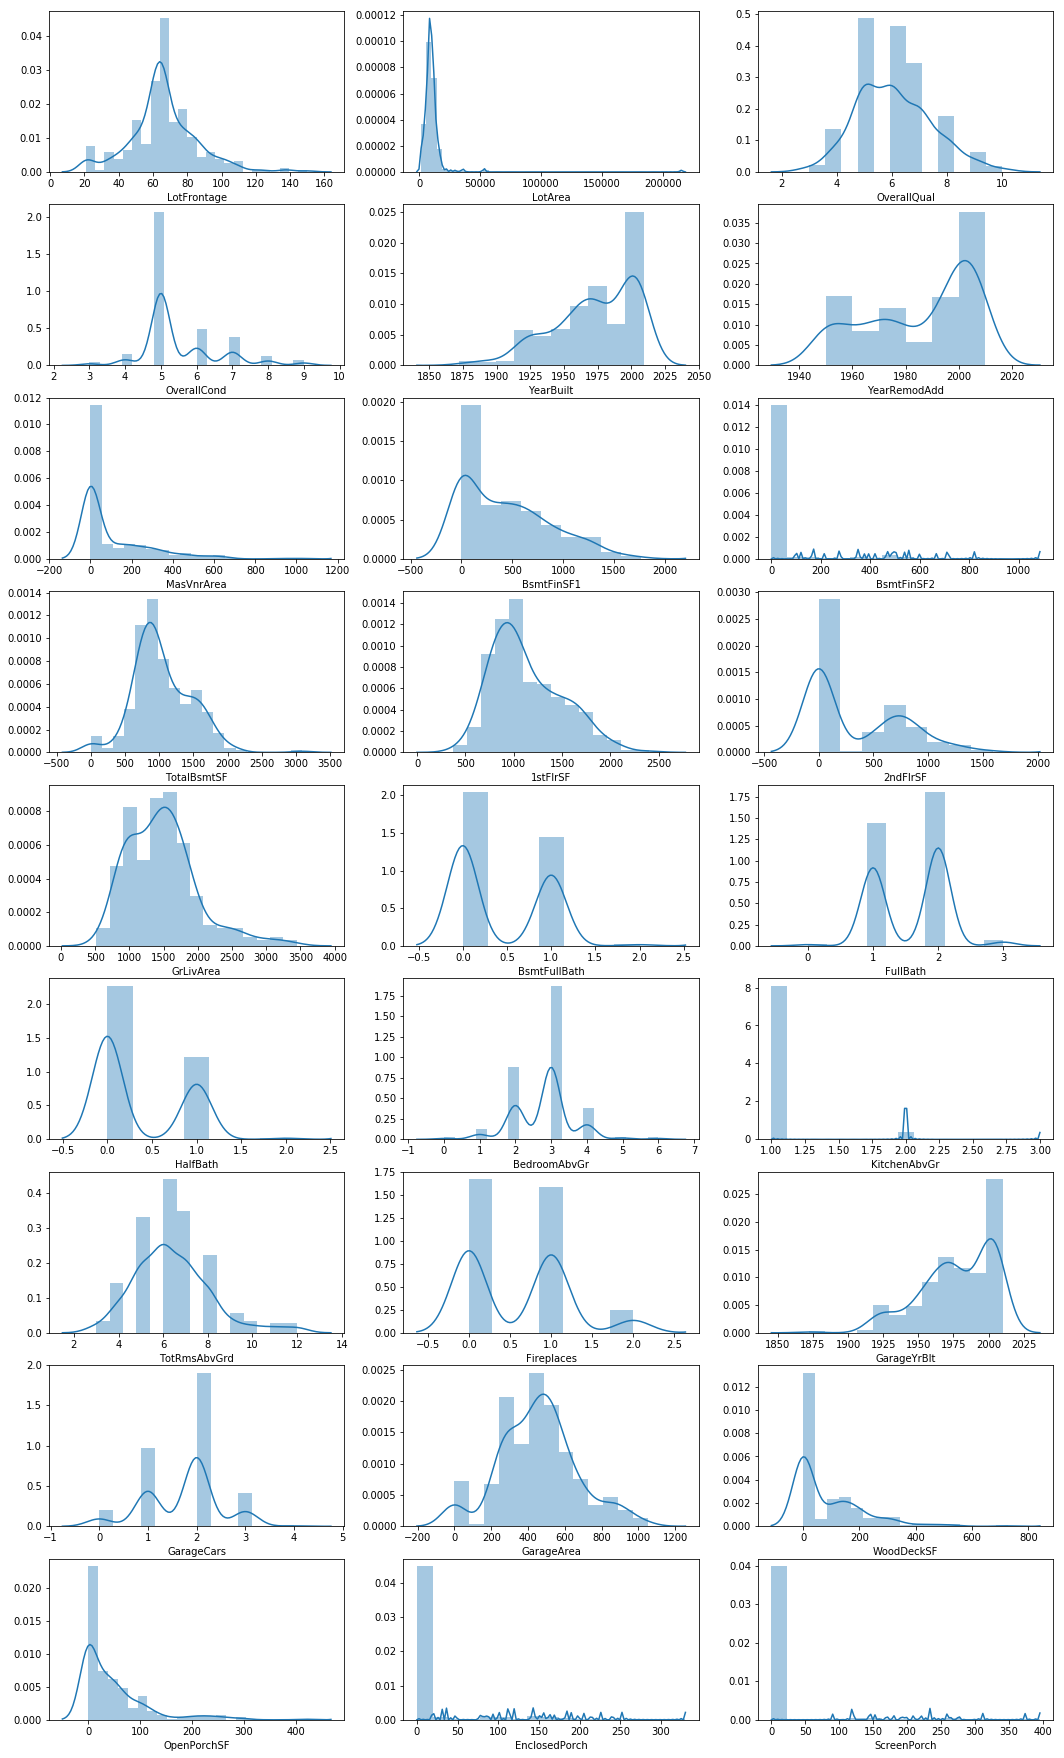

In [178]:
plt.figure(figsize=(18,35),facecolor='white')
plotnumber=1
for column in df_test[n]:
    if plotnumber<=28:
        ax=plt.subplot(10,3,plotnumber)
        sn.distplot(df_test[column])
        plt.xlabel(column,fontsize=10)
    plotnumber=plotnumber+1
plt.show()

### Plotting Box Plot

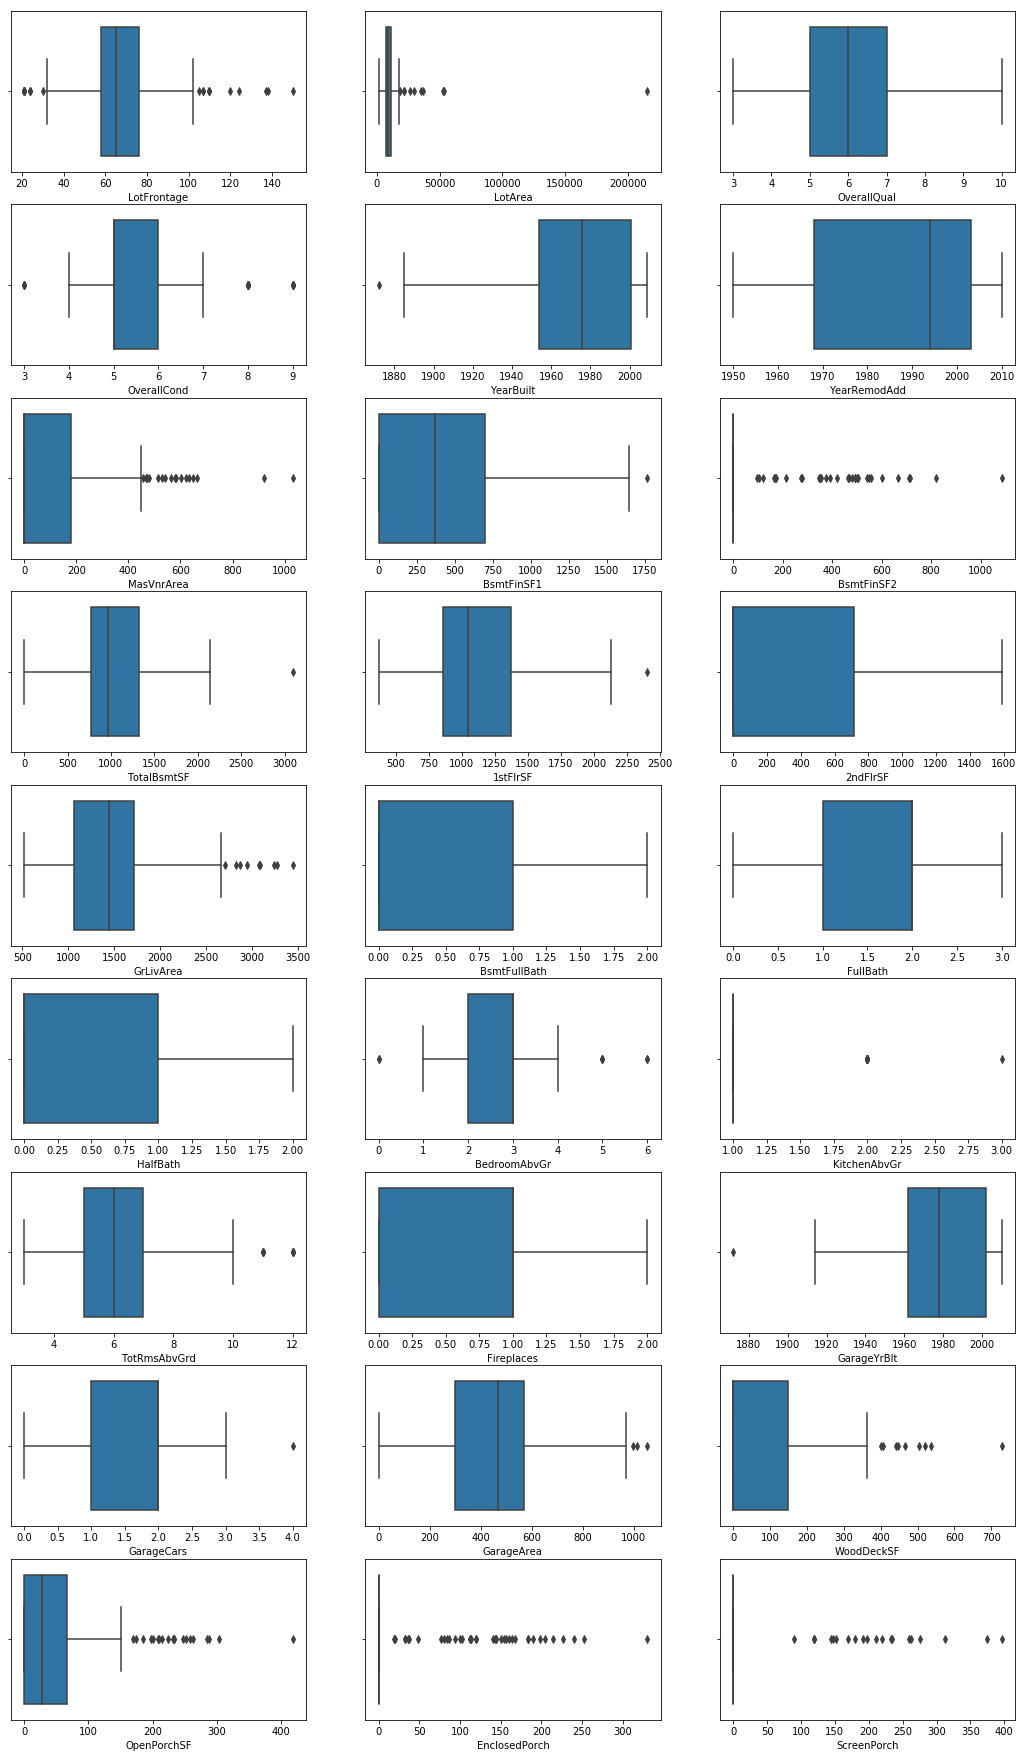

In [179]:
plt.figure(figsize=(18,35),facecolor='white')
plotnumber=1
for column in df_test[n]:
    if plotnumber<=28:
        ax=plt.subplot(10,3,plotnumber)
        sn.boxplot(df_test[column])
        plt.xlabel(column,fontsize=10)
    plotnumber=plotnumber+1
plt.show()

### Checking Skewness

In [180]:
df_test.skew()

MSZoning          0.187174
LotFrontage       0.499491
LotArea          12.781805
Street          -12.020386
Alley            -1.130060
LotShape         -0.639195
LandContour      -3.332422
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.978463
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -0.536455
BsmtCond         -3.979314
BsmtExposure     -1.199372
                   ...    
Electrical       -2.955201
1stFlrSF          0.692047
2ndFlrSF          0.765511
GrLivArea         1.010586
BsmtFullBath      0.463685
FullBath         -0.049800
H

In [181]:
#We are treating skewness by using square root transform
import numpy as np
for col in df_test.skew().index:
    if col in df_test.describe().columns:
        if df_test[col].skew()>0.55:
            df_test[col]=np.sqrt(df_test[col])
        if df_test[col].skew()<-0.55:
            df_test[col]=np.sqrt(df_test[col])   

In [182]:
df_test.skew()   #Checking skewness after removal

MSZoning          0.187174
LotFrontage       0.499491
LotArea           5.201616
Street          -12.020386
Alley            -4.525012
LotShape         -0.703054
LandContour      -3.821158
LotConfig        -1.540456
LandSlope         4.173753
Neighborhood      0.046894
Condition1       -4.094832
Condition2       17.088007
BldgType          1.785749
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.870844
YearBuilt        -0.770262
YearRemodAdd     -0.535600
RoofStyle         1.145759
RoofMatl         12.535240
Exterior1st      -1.357689
Exterior2nd      -1.430894
MasVnrType        0.037914
MasVnrArea        0.886166
ExterQual        -3.611008
ExterCond        -6.323431
Foundation        0.380626
BsmtQual         -0.536455
BsmtCond         -4.978585
BsmtExposure     -1.632765
                   ...    
Electrical       -3.184902
1stFlrSF          0.359384
2ndFlrSF          0.410300
GrLivArea         0.474286
BsmtFullBath      0.463685
FullBath         -0.049800
H

### Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [183]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_test)
x=pd.DataFrame(x,columns=df_test.columns)
x

MSZoning  LotFrontage    LotArea     Street     Alley  LotShape  \
0   -0.287006     0.992288   0.644437   0.083045  0.130237 -1.432186   
1   -0.287006    -0.060430  -0.655483   0.083045  0.130237 -1.432186   
2   -0.287006    -0.060430   0.334751   0.083045  0.130237  0.729469   
3   -0.287006     0.440864   0.357320   0.083045  0.130237  0.729469   
4   -0.287006     0.992288   0.700377   0.083045  0.130237 -1.432186   
5    1.808136    -2.266125  -1.636488   0.083045  0.130237  0.729469   
6    1.808136    -1.564313  -1.130868   0.083045  0.130237  0.729469   
7   -0.287006     2.045006   0.610273   0.083045  0.130237  0.729469   
8   -0.287006    -0.060430   0.466603   0.083045  0.130237  0.729469   
9    1.808136    -1.714701  -0.934352   0.083045  0.130237  0.729469   
10   1.808136    -0.311077  -0.555891   0.083045  0.130237 -1.432186   
11  -0.287006    -0.060430  -0.009571   0.083045  0.130237  0.729469   
12  -0.287006     1.694100   1.511249   0.083045  0.130237  0.729469   
13  -0.287006    -0.812371   2.726773 -12.041595  0.130237  0.729469   
14  -0.287006     2.195394   0.653246   0.083045  0.130237  0.729469   
15  -0.287006    -0.812371  -0.186140   0.083045 -5.358246  0.729469   
16  -0.287006    -0.060430  -0.124606   0.083045  0.130237 -1.432186   
17  -0.287006     0.190217  -0.073129   0.083045  0.130237  0.729469   
18  -2.382148    -1.564313  -1.115875   0.083045  0.130237  0.729469   
19  -0.287006    -1.113148  -0.759130   0.083045  0.130237 -1.432186   
20   1.808136    -0.812371  -0.089117   0.083045  0.130237  0.729469   
21  -0.287006     0.240347  -0.220864   0.083045  0.130237  0.729469   
22  -0.287006    -0.060430   0.120507   0.083045  0.130237 -1.432186   
23   1.808136     0.190217  -0.698570   0.083045  0.130237  0.729469   
24  -0.287006    -0.712113  -0.562019   0.083045  0.130237  0.729469   
25  -0.287006    -1.464054  -0.438806   0.083045  0.130237 -1.432186   
26  -0.287006    -0.210818  -0.268310   0.083045  0.130237  0.729469   
27  -0.287006     0.591253  -0.288384   0.083045  0.130237  0.729469   
28  -0.287006     1.192806   0.315403   0.083045  0.130237  0.729469   
29   1.808136    -0.311077   0.034260   0.083045  0.130237  0.729469   
..        ...          ...        ...        ...       ...       ...   
262  1.808136    -0.812371  -0.661475   0.083045  0.130237  0.729469   
263  1.808136    -1.313666  -0.739589   0.083045  2.403642  0.729469   
264 -0.287006    -0.912630   0.376288   0.083045  0.130237 -0.184154   
265 -2.382148    -0.060430  -1.575319   0.083045  0.130237  0.729469   
266  1.808136    -0.311077   0.186320   0.083045 -5.358246  0.729469   
267 -0.287006    -0.912630   0.996254   0.083045  0.130237 -1.432186   
268 -2.382148     0.290476  -0.147422   0.083045  0.130237  0.729469   
269 -0.287006     0.440864   0.017145   0.083045  0.130237  0.729469   
270 -0.287006     0.691511   1.005215   0.083045  0.130237  0.729469   
271 -0.287006     0.190217  -0.263528   0.083045  0.130237  0.729469   
272 -0.287006     1.493582   0.420042   0.083045  0.130237  0.729469   
273 -0.287006     4.200571  11.137882   0.083045  0.130237  0.332798   
274 -0.287006     0.942158   0.692564   0.083045  0.130237  0.729469   
275 -0.287006    -0.060430  -0.178685   0.083045  0.130237  0.729469   
276 -0.287006    -0.160689  -0.275499   0.083045  0.130237  0.729469   
277  1.808136    -0.311077  -0.503667   0.083045  0.130237  0.729469   
278 -0.287006    -1.163277  -1.259010   0.083045  0.130237  0.729469   
279 -0.287006     0.039829   0.744176   0.083045  0.130237 -1.432186   
280 -0.287006    -0.060430  -0.057229   0.083045  0.130237 -1.432186   
281 -2.382148     0.942158  -0.059291   0.083045  0.130237  0.729469   
282 -0.287006    -0.010301   0.412402   0.083045  0.130237 -1.432186   
283 -0.287006     1.343194   0.369101   0.083045  0.130237  0.729469   
284  1.808136    -1.113148  -0.997920   0.083045  0.130237  0.729469   
285 -0.287006     0.140088  -0.323225   0.083

### Using PCA technique

In [184]:
# PCA is required for the analysis to reduce curse of Dimensionality & at the same time minimizing information loss 
from sklearn.decomposition import PCA
for i in range(20,50):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

20  variance :0.6878382202489023
21  variance :0.70356437345468
22  variance :0.7184140181533843
23  variance :0.7331179633966743
24  variance :0.7471672658168242
25  variance :0.7609358267656487
26  variance :0.7741857868454928
27  variance :0.7860204672281347
28  variance :0.7976416182261394
29  variance :0.8091437213660734
30  variance :0.8195196644848763
31  variance :0.8293624454755152
32  variance :0.8390543920806266
33  variance :0.8482391327051227
34  variance :0.8572870859723238
35  variance :0.8658394822888794
36  variance :0.8741519576746821
37  variance :0.8821978564843607
38  variance :0.8899551051160155
39  variance :0.8976050346780886
40  variance :0.9049191720434647
41  variance :0.9119232272654152
42  variance :0.9184733496817232
43  variance :0.9247832279442549
44  variance :0.9309584440868255
45  variance :0.9366194919151553
46  variance :0.9416284254631571
47  variance :0.946487347741742
48  variance :0.9509817181321427
49  variance :0.955342245980023


In [185]:
#As 49 has the highest value, we will select that
pca = PCA(n_components=49)
x=pca.fit_transform(x)

### Loading the model

In [186]:
mod=joblib.load('Final_Model.pkl')

In [187]:
mod

LinearRegression(n_jobs=-1)

### Prediction over the test data

In [190]:
test_predictions=mod.predict(x)   #Predicting the values

In [191]:
#Making a dataframe for the predictions
test_predictions=pd.DataFrame(test_predictions,columns=['SalePrice'])
test_predictions

SalePrice
0    543.616890
1    445.033536
2    507.586427
3    356.861824
4    509.473847
5    251.809073
6    424.507374
7    527.941175
8    476.991734
9    470.554859
10   269.183479
11   351.221030
12   344.214921
13   440.484139
14   536.351092
15   303.269802
16   354.890439
17   340.583043
18   471.150852
19   393.028764
20   374.167617
21   403.367420
22   399.594887
23   307.270321
24   290.534885
25   369.109505
26   456.995931
27   384.880764
28   439.915616
29   320.124371
..          ...
262  314.278769
263  342.502218
264  477.568417
265  448.588613
266  310.629944
267  406.396276
268  478.531721
269  485.092295
270  399.535253
271  292.018513
272  575.628267
273  400.221083
274  533.486092
275  481.940692
276  437.713834
277  441.897298
278  459.582209
279  616.461355
280  319.850936
281  563.927307
282  374.530642
283  543.214233
284  413.883995
285  365.053082
286  413.875096
287  495.288250
288  411.518409
289  382.114704
290  381.641895
291  344.241862

[292 rows x 1 columns]

We have predicted the values over the test data and now we will save the predicted values separately

### Saving the predicted values

In [192]:
# Saving the predicted values
test_results=pd.DataFrame(test_predictions)
test_results.to_csv('HousingPrice_Project_TestDataResults.csv')

### Conclusion

- After getting an insight of this dataset, we were able to understand that the Housing prices are done on basis of different features.

- First we loaded the train dataset and did the EDA process and other pre-processing techniques like skewness check and removal, handling the outliers present, filling the missing data, visualizing the distribution of data,etc.

- Then we did the model training, building the model and finding out the best model on the basis of different metrices scores we got like Mean Absolute Error, Mean squared Error, Root Mean Squared Error, etc.

- We got Lasso Regressor as the best algorithm among all as it gave more r2_score and cross_val_score. Then for finding out the best parameter and improving the scores, we performed Hyperparameter Tuning.

- As the scores were not increased, we also tried using Ensemble Techniques like RandomForestRegressor and GradientBoostingRegressor algorithms for boosting up our scores.

- We saved the model in a joblib with a filename inorder to use wheneven we require.

- We predicted the values obtained and saved it separately in a csv file.

- Then we used the test dataset and performed all the pre-processing pipeline methods to it.

- After treating skewness, we loaded the saved model that we obtained and did the predictions over the test data and then saving the predictions separately in a csv file.

- From this project, we learnt that how to handle train and test data separately and how to predict the values from them. This will be useful while we are working in a real-time case study as we can get any new data from the client we work on and we can proceed our analysis by loading the best model we obtained and start working on the analysis of the new data we have.

- The final result will be the predictions we get from the new data and saving it separately.

- Overall, we can say that this dataset is good for predicting the Housing prices using GradientBoostingRegressor and regression analysis.

- We can improve the data by adding more features that are positively correlated with the target variable, having less outliers, normally distributed values, etc.